# Extract source SBML-qual model

In [1]:
import os
import libsbml
import pandas as pd
import numpy as np
from collections import Counter
import re
from pathlib import Path

biodivine_model_dir = '/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine_260125/'

In [ ]:
# Extract source files from BioDivine
import os
import shutil

source_directory = biodivine_model_dir + "sources"
destination_directory = biodivine_model_dir

os.makedirs(destination_directory, exist_ok=True)
for subfolder in os.listdir(source_directory):
    subfolder_path = os.path.join(source_directory, subfolder)
    if os.path.isdir(subfolder_path):
        sbml_file_path = os.path.join(subfolder_path, "source.sbml")
        if os.path.isfile(sbml_file_path):
            target_path = os.path.join(destination_directory, f"{subfolder}_source.sbml")
            shutil.copy(sbml_file_path, target_path)
            # print(f"Copied: {sbml_file_path} to {target_path}")
        else:
            print(f"'source.sbml' not found in: {subfolder_path}")

'source.sbml' not found in: /Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine_260125/sources/140_BREAST-CANCER-DRUG-RESISTANCE
'source.sbml' not found in: /Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine_260125/sources/233_BREAST-CANCER-SIGNALLING-PATHWAYS-T47D-COMPLETE
'source.sbml' not found in: /Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine_260125/sources/264_PREIMPLANTATION-EMBRYO-TROPHECTODERM-1
'source.sbml' not found in: /Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine_260125/sources/084_ABA-INDUCED-STOMATAL-CLOSURE
'source.sbml' not found in: /Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine_260125/sources/237_COLORECTAL-TUMORIGENESIS-REVERSION-SWITCH
'source.sbml' not found in: /Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine_260125/sources/265_PREIMPLANTATION-EMBRYO-TROPHECTODERM-1-MATURE
'source.sbml' not found in: /Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine_260125/sources/075_INFLAMMATORY-BOWEL-DISEASE
'source.sbml' not found in: /Users/luna/Deskto

# Metadata

In [18]:
source_directory = biodivine_model_dir + "sources"
repo_dic = {}
keywords_unfound = []

import json
# Iterate through the subfolders in the source directory
for subfolder in os.listdir(source_directory):
    subfolder_path = os.path.join(source_directory, subfolder)
    if os.path.isdir(subfolder_path):
        metadata_path = os.path.join(subfolder_path, "metadata.json")
        if os.path.isfile(metadata_path):
            # extract keywords
            with open(metadata_path, 'r') as f:
                metadata = json.load(f)
            keywords = metadata.get('keywords', [])
            if keywords[0] != 'curated':
                repo_dic[f"{subfolder}_source.sbml"] = keywords[0]
            else:
                keywords_unfound.append(f"{subfolder}_source.sbml")

# Print the results
print(repo_dic)

{'149_AGS-CELL-FATE-DECISION-REDUCED_source.sbml': 'ginsim', '178_MAST-CELL-ACTIVATION_source.sbml': 'ginsim', '127_PAMP-SIGNALING_source.sbml': 'covid-disease-map', '068_AURORA-KINASE-A-IN-NEUROBLASTOMA_source.sbml': 'cell-collective', '172_DROSOPHILA-GAP-D_source.sbml': 'ginsim', '015_NEUROTRANSMITTER-SIGNALING-PATHWAY_source.sbml': 'cell-collective', '184_P53-MDM2-NETWORK_source.sbml': 'ginsim', '083_SIGNALING-IN-PROSTATE-CANCER_source.sbml': 'ginsim', '188_MAMMAL-SEX-DETERMINATION-2-CELL_source.sbml': 'ginsim', '089_MAPK-REDUCED-1_source.sbml': 'ginsim', '023_MAMMALIAN-CELL-CYCLE-2006_source.sbml': 'cell-collective', '054_PC12-CELL-DIFFERENTIATION_source.sbml': 'cell-collective', '142_BLOOD-STEM-CELL_source.sbml': 'biomodels', '113_ER-STRESS_source.sbml': 'covid-disease-map', '036_HCC1954-BREAST-CELL-LINE-SHORT-TERM_source.sbml': 'cell-collective', '131_TGFB-PATHWAY_source.sbml': 'covid-disease-map', '161_DIFFERENTIATION-OF-MONOCYTES_source.sbml': 'ginsim', '075_INFLAMMATORY-BOWEL-

In [20]:
len(keywords_unfound)

63

# Annotation statistics

In [15]:
RDF_TAG_ITEM = ['rdf:RDF',
                'xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"',
                'xmlns:dcterms="http://purl.org/dc/terms/"',
                'xmlns:vcard4="http://www.w3.org/2006/vcard/ns#"',
                'xmlns:bqbiol="http://biomodels.net/biology-qualifiers/"',
                'xmlns:bqmodel="http://biomodels.net/model-qualifiers/"']
RDF_TAG = ' '.join(RDF_TAG_ITEM)

def get_gene_annotation_string(sbml_file):
    """
    Extract GeneProducts annotatino string from an SBML-qual model.

    Parameters:
    - sbml_file (str): Path to the SBML file.

    Returns:
    - list: List of GeneProduct annotation strings.
    """
    # Read the SBML model
    reader = libsbml.SBMLReader()
    document = reader.readSBML(sbml_file)
    model = document.getModel()
    if model is None:
        print(f"Failed to read the model: {sbml_file}")
        return []
    # Check if the model uses the qual package
    qual_plugin = model.getPlugin("qual")
    if not qual_plugin:
        print(f"The model does not use the qual package: {sbml_file}")
        return []
    # Get GeneProducts from the plugin
    gene_annotations = []
    species = qual_plugin.getListOfQualitativeSpecies()
    for i in range(len(species)):
        one_species = species[i]
        annotation_string = one_species.getAnnotationString()
        gene_annotations.append(annotation_string)
    return gene_annotations

def extract_ontology_from_items(items_list):
    """
    Extract ontology from items and return a flat list of tuples.
    Each tuple contains (ontology type, ontology id).

    Parameters
    ----------
    items_list : list
        A list of string items containing ontology annotations.

    Returns
    -------
    list of tuples
        A flat list of (ontology type, ontology id).
    """
    result_identifiers = []
    for item in items_list:
        # Extract identifiers from "urn:miriam" URIs (urn:miriam:TYPE:ID)
        miriam_matches = re.findall(r'urn:miriam:([^"]+)"', item)
        for r in miriam_matches:
            if ':' in r:
                ontology_type, ontology_id = r.split(":", 1)
                result_identifiers.append((ontology_type, ontology_id))
        # Extract identifiers from identifiers.org URLs (identifiers.org/TYPE/ID)
        idorg_matches = re.findall(r'identifiers\.org/([^"/]+)/([^"/]+)', item)
        for ontology_type, ontology_id in idorg_matches:
            result_identifiers.append((ontology_type, ontology_id))
    return result_identifiers

def divideExistingAnnotation(inp_str, qualifier):
    """
    Parse the annotation string to extract items in multiple <rdf:Bag> elements 
    under the specified qualifier (e.g., <bqbiol:is>), and keep the rest in the container.
    Ensures namespaces and structure are preserved when creating an empty qualifier block.

    Parameters
    ----------
    inp_str: str
        The full annotation string.
    qualifier: str
        The qualifier to target (e.g., bqbiol:is, bqbiol:isDescribedBy).

    Returns
    -------
    dict:
        - 'container': The annotation string with the qualifier blocks replaced by a single empty block.
        - 'items': A list of <rdf:li> elements found in all <rdf:Bag> containers of the specified qualifier.
        - If no qualifier blocks are found, returns None.
    """

    # Regex to match all blocks for the specified qualifier, including attributes
    qualifier_pattern = rf"(<{qualifier}\b[^>]*?>\s*<rdf:Bag>.*?</rdf:Bag>\s*</{qualifier}>)"
    qualifier_matches = re.findall(qualifier_pattern, inp_str, re.DOTALL)

    if not qualifier_matches:
        return None  # Return None if no blocks for the qualifier are found

    # Collect all <rdf:li> elements from each matched block
    rdf_li_pattern = r"<rdf:li[^>]*\/>"
    items = []
    for block in qualifier_matches:
        items.extend(re.findall(rdf_li_pattern, block))

    # Extract the opening tag with attributes from the first match
    match_prefix = re.match(rf"<{qualifier}.*?>", qualifier_matches[0])
    if match_prefix:
        qualifier_opening = match_prefix.group()  # Capture opening tag with attributes
    else:
        qualifier_opening = f"<{qualifier}>"

    # Construct a single empty qualifier block using the preserved attributes
    empty_qualifier_block = (
        f"      {qualifier_opening}\n"
        f"        <rdf:Bag>\n"
        f"        </rdf:Bag>\n"
        f"      </{qualifier}>"
    )
    # Remove all original qualifier blocks from the container
    stripped_annotation = re.sub(qualifier_pattern, "", inp_str, flags=re.DOTALL).strip()

    # Reinsert the empty qualifier block with namespaces added
    if RDF_TAG not in stripped_annotation:
        container = stripped_annotation.replace(
            "<rdf:RDF",
            f"<{RDF_TAG}",
        )
    else:
        container = stripped_annotation

    container = container.replace(
        "</rdf:Description>",
        f"{empty_qualifier_block}\n    </rdf:Description>"
    )
    # Remove repeated blank lines
    container = re.sub(r"\n\s*\n", "\n", container)
    return {"container": container, "items": items}

def getOntologyFromString(string_annotation, description=False):
    """
    Parse string and return string annotation,
    marked as <bqbiol:is> or <bqbiol:isVersionOf>;
    (and extract the description using <bqbiol:isDescribedBy>)
    If neither exists, return None.

    Parameters
    ----------
    string_annotation: str
    description: bool
        If True, also extract the description using <bqbiol:isDescribedBy>.

    Returns
    -------
    list-tuple (ontology type, ontology id)
         Return [] if none is provided.
    """

    # Define the bqbiol qualifiers to search
    bqbiol_qualifiers = ['is', 'isVersionOf']
    if description:
        bqbiol_qualifiers.append('isDescribedBy')

    result_identifiers = []
    for one_qualifier in bqbiol_qualifiers:
        res = divideExistingAnnotation(string_annotation, 'bqbiol:' + one_qualifier)
        if res is None:
            continue
        items = res['items']
        res = extract_ontology_from_items(items)
        # remove empty lists and duplicates
        res = [r for r in res if r is not None and r != [] and r not in result_identifiers]
        result_identifiers.extend(res)

    return result_identifiers
def collect_ontology_statistics(model_dir, overall_output_csv, model_ontology_csv, description = False):
    """
    Collect ontology statistics of SBML models in a folder.

    Parameters:
    - folder_path (str): Path to the folder containing SBML models.
    - overall_output_csv (str): Path to save overall statistics as a CSV.
    - model_ontology_csv (str): Path to save per-model statistics as a CSV.
    - description (bool): If True, extract the description using <bqbiol:isDescribedBy>
    """
    overall_counter = Counter()
    model_data = []

    # Iterate over all SBML files in the folder
    model_files = [f for f in os.listdir(model_dir) if f.endswith('.xml') or f.endswith('.sbml')]
    for idx, file_name in enumerate(model_files):
        print(f"We are at {idx}: Processing {file_name}")
        file_path = os.path.join(model_dir, file_name)
        gene_annotations = get_gene_annotation_string(file_path)

        model_counter = Counter()
        for gene_annotation in gene_annotations:
            resources = getOntologyFromString(gene_annotation, description = description)
            # Count ontology types
            if resources is not None and resources != []:
                for ontology_type, ontology_id in resources:
                    overall_counter[ontology_type] += 1
                    model_counter[ontology_type] += 1

        # Store model-level data
        for ontology_type, count in model_counter.items():
            model_data.append({
                'model': file_name,
                'ontology_type': ontology_type,
                'count': count
            })

    # Convert overall statistics to a DataFrame
    overall_stats_df = pd.DataFrame.from_dict(overall_counter, orient='index', columns=['count'])
    overall_stats_df.reset_index(inplace=True)
    overall_stats_df.columns = ['ontology_type', 'count']

    # Convert model-specific data to a DataFrame
    model_stats_df = pd.DataFrame(model_data)

    # Save the dataframes to CSV
    overall_stats_df.to_csv(overall_output_csv, index=False)
    model_stats_df.to_csv(model_ontology_csv, index=False)
    print(f"Overall statistics saved to {overall_output_csv}")
    print(f"Model-specific statistics saved to {model_ontology_csv}")

In [16]:
output_csv = biodivine_model_dir+"biodivine_260125_ontology_statistics.csv"
model_ontology_csv = biodivine_model_dir+"biodivine_260125_model_ontology_statistics.csv"
collect_ontology_statistics(biodivine_model_dir, output_csv, model_ontology_csv, description = True)

We are at 0: Processing 054_PC12-CELL-DIFFERENTIATION_source.sbml
We are at 1: Processing 038_SKBR3-BREAST-CELL-LINE-LONG-TERM_source.sbml
We are at 2: Processing 073_LYMPHOID-AND-MYELOID-CELL-SPECIFICATION_source.sbml
We are at 3: Processing 126_ORF3A_source.sbml
We are at 4: Processing 043_BORDETELLA-BRONCHISEPTICA_source.sbml
We are at 5: Processing 239_M1-SYNOVIAL-MACROPHAGE_source.sbml
We are at 6: Processing 161_DIFFERENTIATION-OF-MONOCYTES_source.sbml
We are at 7: Processing 078_IMMUNE-SYSTEM_source.sbml
We are at 8: Processing 009_YEAST-APOPTOSIS_source.sbml
We are at 9: Processing 072_LYMPHOPOIESIS-REGULATORY-NETWORK_source.sbml
We are at 10: Processing 065_TUMOUR-CELL-INVASION-AND-MIGRATION_source.sbml
We are at 11: Processing 198_PAIR-RULE-MODULE_source.sbml
We are at 12: Processing 090_MAPK-REDUCED-2_source.sbml
We are at 13: Processing 179_MICROENVIRONMENT-CONTROL_source.sbml
We are at 14: Processing 029_TOLL-PATHWAY-OF-DROSOPHILA_source.sbml
We are at 15: Processing 010_C

In [18]:
model_ontology = pd.read_csv(biodivine_model_dir+"biodivine_260125_model_ontology_statistics.csv")
print(f"Total number of models with annotation: {model_ontology['model'].nunique()}")
model_ontology[model_ontology['ontology_type'] == 'pubmed']

Total number of models with annotation: 86


,model,ontology_type,count
0,038_SKBR3-BREAST-CELL-LINE-LONG-TERM_source.sbml,pubmed,71
3,126_ORF3A_source.sbml,pubmed,2
5,043_BORDETELLA-BRONCHISEPTICA_source.sbml,pubmed,42
6,239_M1-SYNOVIAL-MACROPHAGE_source.sbml,pubmed,588
18,078_IMMUNE-SYSTEM_source.sbml,pubmed,31
...,...,...,...
288,033_BT474-BREAST-CELL-LINE-LONG-TERM_source.sbml,pubmed,72
289,030_SPZ-NETWORK-OF-DROSOPHILA_source.sbml,pubmed,46
290,024_BUDDING-YEAST-CELL-CYCLE_source.sbml,pubmed,57
291,027_WG-PATHWAY-OF-DROSOPHILA_source.sbml,pubmed,61


# Test on Converter

Test TabularQual converter by converting SBML → Spreadsheet → SBML and comparing counts.


In [2]:
import os
import sys
import libsbml
import pandas as pd
import re
from collections import Counter
import warnings

# Import TabularQual converter
sys.path.insert(0, '/Users/luna/Desktop/CRBM/Standards/TabularQual')
from TabularQual_converter.convert_sbml_to_spreadsheet import convert_sbml_to_spreadsheet
from TabularQual_converter.convert_spreadsheet_to_sbml import convert_spreadsheet_to_sbml
from TabularQual_converter.sbml_reader import read_sbml

# Create output directories
spreadsheet_output_dir = os.path.join(biodivine_model_dir, "spreadsheets")
sbml_output_dir = os.path.join(biodivine_model_dir, "converted_sbml")
os.makedirs(spreadsheet_output_dir, exist_ok=True)
os.makedirs(sbml_output_dir, exist_ok=True)

In [3]:
def count_sbml_stats(sbml_path):
    """
    Count stats using unique URIs only to match spreadsheet logic.
    Bypasses libsbml metaid filtering by parsing raw annotation XML.
    """
    try:
        reader = libsbml.SBMLReader()
        document = reader.readSBML(sbml_path)
        model = document.getModel()
        if model is None: return {"error": "No model found"}
        qual_plugin = model.getPlugin("qual")

        def get_uri_count(element):
            if not element.isSetAnnotation():
                return 0
            # Get raw XML to find all resources, even if MetaID is missing
            raw_xml = element.getAnnotationString()
            # Regex to find all resource URIs
            found_uris = re.findall(r'rdf:resource="([^"]+)"', raw_xml)
            
            # Normalize URIs (remove prefixes) to ensure a match with spreadsheet strings
            normalized = set()
            for uri in found_uris:
                clean = uri.replace('urn:miriam:', '') \
                           .replace('https://identifiers.org/', '') \
                           .replace('http://identifiers.org/', '')
                normalized.add(clean.strip())
            return len(normalized)

        species_count = qual_plugin.getNumQualitativeSpecies()
        transitions_count = qual_plugin.getNumTransitions()

        return {
            "species_count": species_count,
            "transitions_count": transitions_count,
            "species_annotations": sum(get_uri_count(qual_plugin.getQualitativeSpecies(i)) for i in range(species_count)),
            "transition_annotations": sum(get_uri_count(qual_plugin.getTransition(i)) for i in range(transitions_count)),
            "error": None
        }
    except Exception as e:
        return {"error": str(e)}

def count_spreadsheet_stats(xlsx_path):
    """
    Count stats from spreadsheet using unique URIs only.
    """
    try:
        from TabularQual_converter.spreadsheet_reader import read_spreadsheet_to_model
        model, _ = read_spreadsheet_to_model(xlsx_path)

        def get_uri_count(obj):
            unique_uris = set()
            for anno in obj.annotations:
                uri = anno[1]
                
                # Normalize prefixes to match the SBML cleaning logic
                clean = uri.replace('urn:miriam:', '') \
                           .replace('https://identifiers.org/', '') \
                           .replace('http://identifiers.org/', '')
                unique_uris.add(clean.strip())
            return len(unique_uris)

        s_annos = sum(get_uri_count(sp) for sp in model.species.values())
        t_annos = sum(get_uri_count(tr) for tr in model.transitions)

        return {
            "species_count": len(model.species),
            "transitions_count": len(model.transitions),
            "species_annotations": s_annos,
            "transition_annotations": t_annos,
            "error": None
        }
    except Exception as e:
        return {"error": str(e)}

In [4]:
import time

results = []

# Get all SBML files
model_files = [f for f in os.listdir(biodivine_model_dir) 
               if (f.endswith('.xml') or f.endswith('.sbml')) and os.path.isfile(os.path.join(biodivine_model_dir, f))]
print(f"Found {len(model_files)} SBML models to process")

for idx, file_name in enumerate(model_files):
    print(f"\n[{idx+1}/{len(model_files)}] Processing: {file_name}")
    
    original_sbml_path = os.path.join(biodivine_model_dir, file_name)
    base_name = os.path.splitext(file_name)[0]
    
    # Output paths
    spreadsheet_path = os.path.join(spreadsheet_output_dir, f"{base_name}.xlsx")
    converted_sbml_path = os.path.join(sbml_output_dir, f"{base_name}_converted.sbml")
    
    result = {
        "model": file_name,
        "original_sbml_species": None,
        "original_sbml_transitions": None,
        "original_sbml_species_anno": None,
        "original_sbml_trans_anno": None,
        "spreadsheet_species": None,
        "spreadsheet_transitions": None,
        "spreadsheet_species_anno": None,
        "spreadsheet_trans_anno": None,
        "converted_sbml_species": None,
        "converted_sbml_transitions": None,
        "converted_sbml_species_anno": None,
        "converted_sbml_trans_anno": None,
        "sbml_to_xlsx_time": None,
        "xlsx_to_sbml_time": None,
        "sbml_to_xlsx_error": None,
        "xlsx_to_sbml_error": None,
    }
    
    # Count stats from original SBML
    orig_stats = count_sbml_stats(original_sbml_path)
    if orig_stats.get("error"):
        result["sbml_to_xlsx_error"] = orig_stats["error"]
        results.append(result)
        print(f"  Error reading original SBML: {orig_stats['error']}")
        continue
    
    result["original_sbml_species"] = orig_stats["species_count"]
    result["original_sbml_transitions"] = orig_stats["transitions_count"]
    result["original_sbml_species_anno"] = orig_stats["species_annotations"]
    result["original_sbml_trans_anno"] = orig_stats["transition_annotations"]
    
    # Convert SBML to spreadsheet
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            start_time = time.time()
            convert_sbml_to_spreadsheet(
                original_sbml_path, 
                spreadsheet_path, 
                template_path=None,  # No template to skip README/Appendix
                rule_format="operators",
                validate=False, # no validation
                print_messages=False # no messages
            )
            sbml_to_xlsx_time = time.time() - start_time
            result["sbml_to_xlsx_time"] = round(sbml_to_xlsx_time, 3)
        print(f"  Converted to spreadsheet in {sbml_to_xlsx_time:.3f}s")
    except Exception as e:
        result["sbml_to_xlsx_error"] = str(e)
        results.append(result)
        print(f"  Error converting to spreadsheet: {e}")
        continue
    
    # Count stats from spreadsheet
    xlsx_stats = count_spreadsheet_stats(spreadsheet_path)
    if xlsx_stats.get("error"):
        result["sbml_to_xlsx_error"] = xlsx_stats["error"]
    else:
        result["spreadsheet_species"] = xlsx_stats["species_count"]
        result["spreadsheet_transitions"] = xlsx_stats["transitions_count"]
        result["spreadsheet_species_anno"] = xlsx_stats["species_annotations"]
        result["spreadsheet_trans_anno"] = xlsx_stats["transition_annotations"]
    
    # Convert spreadsheet back to SBML
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            start_time = time.time()
            convert_spreadsheet_to_sbml(
                spreadsheet_path,
                converted_sbml_path,
                interactions_anno=False, # no existing interaction annotations
                transitions_anno=True,
                validate=False, # no validation
                print_messages=False # no messages
            )
            xlsx_to_sbml_time = time.time() - start_time
            result["xlsx_to_sbml_time"] = round(xlsx_to_sbml_time, 3)
        print(f"  Converted back to SBML in {xlsx_to_sbml_time:.3f}s")
    except Exception as e:
        result["xlsx_to_sbml_error"] = str(e)
        results.append(result)
        print(f"  Error converting to SBML: {e}")
        continue
    
    # Count stats from converted SBML
    conv_stats = count_sbml_stats(converted_sbml_path)
    if conv_stats.get("error"):
        result["xlsx_to_sbml_error"] = conv_stats["error"]
    else:
        result["converted_sbml_species"] = conv_stats["species_count"]
        result["converted_sbml_transitions"] = conv_stats["transitions_count"]
        result["converted_sbml_species_anno"] = conv_stats["species_annotations"]
        result["converted_sbml_trans_anno"] = conv_stats["transition_annotations"]
    
    results.append(result)

print(f"\n\nProcessed {len(results)} models")


Found 205 SBML models to process

[1/205] Processing: 054_PC12-CELL-DIFFERENTIATION_source.sbml
  Error converting to spreadsheet: SBML parsing errors: A <layout> object must have the required attribute 'layout:id' and may have the optional attribute 'layout:name'. No other attributes from the SBML Level 3 Layout namespace are permitted on a <layout> object.
Reference: L3V1 Layout V1 Section 3.6
 Layout attribute 'id' is missing.


[2/205] Processing: 038_SKBR3-BREAST-CELL-LINE-LONG-TERM_source.sbml
  Converted to spreadsheet in 0.062s
  Converted back to SBML in 0.090s

[3/205] Processing: 073_LYMPHOID-AND-MYELOID-CELL-SPECIFICATION_source.sbml
  Converted to spreadsheet in 0.050s
  Converted back to SBML in 0.087s

[4/205] Processing: 126_ORF3A_source.sbml
  Error converting to spreadsheet: SBML parsing errors: An <input> object may have the optional 'metaid' and 'sboTerm' defined by SBML Level 3 Core.  No other attributes from the SBML Level 3 Core namespace or the Qualitative Model

In [ ]:
output_csv = "biodivine_260203_results.csv"

# Create results DataFrame and save to CSV
results_df = pd.DataFrame(results)

# Add comparison columns to check if counts match
results_df["species_match"] = (
    (results_df["original_sbml_species"] == results_df["spreadsheet_species"]) & 
    (results_df["spreadsheet_species"] == results_df["converted_sbml_species"])
)
results_df["transitions_match"] = (
    (results_df["original_sbml_transitions"] == results_df["spreadsheet_transitions"]) & 
    (results_df["spreadsheet_transitions"] == results_df["converted_sbml_transitions"])
)
# For annotations, we compare original to spreadsheet
results_df["species_anno_match"] = (
    (results_df["original_sbml_species_anno"] == results_df["spreadsheet_species_anno"]) &
    (results_df["spreadsheet_species_anno"] == results_df["converted_sbml_species_anno"])
)
results_df["trans_anno_match"] = (
    (results_df["original_sbml_trans_anno"] == results_df["spreadsheet_trans_anno"]) &
    (results_df["spreadsheet_trans_anno"] == results_df["converted_sbml_trans_anno"])
)

# Reorder columns for better readability
column_order = [
    "model",
    "original_sbml_species", "spreadsheet_species", "converted_sbml_species", "species_match",
    "original_sbml_transitions", "spreadsheet_transitions", "converted_sbml_transitions", "transitions_match",
    "original_sbml_species_anno", "spreadsheet_species_anno", "converted_sbml_species_anno", "species_anno_match",
    "original_sbml_trans_anno", "spreadsheet_trans_anno", "converted_sbml_trans_anno", "trans_anno_match",
    "sbml_to_xlsx_time", "xlsx_to_sbml_time",
    "sbml_to_xlsx_error", "xlsx_to_sbml_error"
]
results_df = results_df[[c for c in column_order if c in results_df.columns]]

# Save to CSV
results_df.to_csv(output_csv, index=False)
print(f"Results saved to: {output_csv}")
# results_df = pd.read_csv(output_csv)

# Summary statistics
total = len(results_df)
successful = results_df[results_df["sbml_to_xlsx_error"].isna() & results_df["xlsx_to_sbml_error"].isna()]
species_match = successful["species_match"].sum()
trans_match = successful["transitions_match"].sum()
species_anno_match = successful["species_anno_match"].sum()
trans_anno_match = successful["trans_anno_match"].sum()

print(f"\n=== Summary ===")
print(f"Total models: {total}")
print(f"Successfully converted: {len(successful)}")
print(f"Species count matches: {species_match}/{len(successful)}")
print(f"Transitions count matches: {trans_match}/{len(successful)}")
print(f"Species annotation matches: {species_anno_match}/{len(successful)}")
print(f"Transition annotation matches: {trans_anno_match}/{len(successful)}")

# Show errors if any
errors = results_df[results_df["sbml_to_xlsx_error"].notna() | results_df["xlsx_to_sbml_error"].notna()]
if len(errors) > 0:
    print(f"\nModels with errors ({len(errors)}):")
    for _, row in errors.iterrows():
        print(f"  {row['model']}: {row['sbml_to_xlsx_error'] or row['xlsx_to_sbml_error']}")

Results saved to: biodivine_260203_results.csv

=== Summary ===
Total models: 205
Successfully converted: 172
Species count matches: 172/172
Transitions count matches: 172/172
Species annotation matches: 167/172
Transition annotation matches: 172/172

Models with errors (33):
  054_PC12-CELL-DIFFERENTIATION_source.sbml: SBML parsing errors: A <layout> object must have the required attribute 'layout:id' and may have the optional attribute 'layout:name'. No other attributes from the SBML Level 3 Layout namespace are permitted on a <layout> object.
Reference: L3V1 Layout V1 Section 3.6
 Layout attribute 'id' is missing.

  126_ORF3A_source.sbml: SBML parsing errors: An <input> object may have the optional 'metaid' and 'sboTerm' defined by SBML Level 3 Core.  No other attributes from the SBML Level 3 Core namespace or the Qualitative Models namespace are permitted on an <input> object.
Reference: L3V1 Qual V1 Section 3.6.1
  Attribute 'essential' is not part of the definition of an SBML Le

In [6]:
# Annotation analysis
# Note: Original SBML often uses "urn:miriam" URIs while the converter 
# produces identifiers.org URLs. The counts should still match.

print("=== Annotation Statistics ===")
print(f"\nOriginal SBML annotations:")
print(f"  Species annotations: {successful['original_sbml_species_anno'].sum()}")
print(f"  Transition annotations: {successful['original_sbml_trans_anno'].sum()}")

print(f"\nSpreadsheet annotations:")
print(f"  Species annotations: {successful['spreadsheet_species_anno'].sum()}")
print(f"  Transition annotations: {successful['spreadsheet_trans_anno'].sum()}")

print(f"\nConverted SBML annotations:")
print(f"  Species annotations: {successful['converted_sbml_species_anno'].sum()}")
print(f"  Transition annotations: {successful['converted_sbml_trans_anno'].sum()}")

# Show models with annotation differences
anno_diff = successful[
    (successful['original_sbml_species_anno'] != successful['spreadsheet_species_anno']) |
    (successful['original_sbml_trans_anno'] != successful['spreadsheet_trans_anno'])
]
if len(anno_diff) > 0:
    print(f"\nModels with annotation count differences ({len(anno_diff)}):")
    anno_cols = ["model", 
                 "original_sbml_species_anno", "spreadsheet_species_anno", "converted_sbml_species_anno",
                 "original_sbml_trans_anno", "spreadsheet_trans_anno", "converted_sbml_trans_anno"]
    display(anno_diff[anno_cols].head(20))
else:
    print("\nAll annotation counts match between original SBML and spreadsheet!")

# Timing statistics
print(f"\n=== Timing Statistics ===")
print(f"Total SBML → Spreadsheet time: {successful['sbml_to_xlsx_time'].sum():.2f}s")
print(f"Total Spreadsheet → SBML time: {successful['xlsx_to_sbml_time'].sum():.2f}s")
print(f"Average SBML → Spreadsheet time: {successful['sbml_to_xlsx_time'].mean():.3f}s")
print(f"Average Spreadsheet → SBML time: {successful['xlsx_to_sbml_time'].mean():.3f}s")
print(f"Max SBML → Spreadsheet time: {successful['sbml_to_xlsx_time'].max():.3f}s")
print(f"Max Spreadsheet → SBML time: {successful['xlsx_to_sbml_time'].max():.3f}s")


=== Annotation Statistics ===

Original SBML annotations:
  Species annotations: 25877
  Transition annotations: 2649

Spreadsheet annotations:
  Species annotations: 25919.0
  Transition annotations: 2649.0

Converted SBML annotations:
  Species annotations: 25919.0
  Transition annotations: 2649.0

Models with annotation count differences (5):


,model,original_sbml_species_anno,spreadsheet_species_anno,converted_sbml_species_anno,original_sbml_trans_anno,spreadsheet_trans_anno,converted_sbml_trans_anno
61,241_RHEUMATOID-ARTHRITIS-TH1_source.sbml,525,527.0,527.0,68,68.0,68.0
102,130_RENIN-ANGIOTENSIN_source.sbml,233,241.0,241.0,173,173.0,173.0
150,113_ER-STRESS_source.sbml,631,634.0,634.0,302,302.0,302.0
166,242_RHEUMATOID-ARTHRITIS-FIBROBLAST_source.sbml,9528,9553.0,9553.0,76,76.0,76.0
177,124_NSP9-PROTEIN_source.sbml,784,788.0,788.0,299,299.0,299.0



=== Timing Statistics ===
Total SBML → Spreadsheet time: 11.65s
Total Spreadsheet → SBML time: 18.69s
Average SBML → Spreadsheet time: 0.068s
Average Spreadsheet → SBML time: 0.109s
Max SBML → Spreadsheet time: 0.495s
Max Spreadsheet → SBML time: 1.243s


# Mismatching annotations

In [7]:
# For models with annotation count differences, extract and compare annotations

def get_sbml_species_annotations(sbml_path):
    """Extract all species annotations from SBML file as a dict of {species_id: [uri, ...]}"""
    reader = libsbml.SBMLReader()
    document = reader.readSBML(sbml_path)
    model = document.getModel()
    if model is None:
        return {}
    
    qual_plugin = model.getPlugin("qual")
    if not qual_plugin:
        return {}
    
    annotations = {}
    for i in range(qual_plugin.getNumQualitativeSpecies()):
        qs = qual_plugin.getQualitativeSpecies(i)
        species_id = qs.getId()
        if qs.isSetAnnotation():
            anno_str = qs.getAnnotationString()
            # Extract all resource URIs
            resources = re.findall(r'<rdf:li[^>]*resource="([^"]+)"', anno_str)
            annotations[species_id] = resources
        else:
            annotations[species_id] = []
    return annotations


def get_spreadsheet_species_annotations(xlsx_path):
    """Extract all species annotations from spreadsheet as a dict of {species_id: [uri, ...]}"""
    from TabularQual_converter.spreadsheet_reader import read_spreadsheet_to_model
    model, _ = read_spreadsheet_to_model(xlsx_path)
    
    annotations = {}
    for species_id, sp in model.species.items():
        # Annotations are stored as (qualifier, identifier) tuples
        annotations[species_id] = [ident for qual, ident in sp.annotations]
    return annotations


def normalize_uri(uri):
    """Normalize URI to comparable format (strip urn:miriam: prefix, convert to identifiers.org style)"""
    # # Handle urn:miriam format: urn:miriam:TYPE:ID -> TYPE:ID
    # if uri.startswith("urn:miriam:"):
    #     parts = uri[11:].split(":", 1)
    #     if len(parts) == 2:
    #         return f"{parts[0]}:{parts[1]}"
    #     return uri[11:]
    # # Handle identifiers.org format: https://identifiers.org/TYPE/ID -> TYPE:ID
    # if "identifiers.org/" in uri:
    #     match = re.search(r'identifiers\.org/([^/]+)/([^/]+)$', uri)
    #     if match:
    #         return f"{match.group(1)}:{match.group(2)}"
    # # If already in TYPE:ID form (e.g., pubmed:12345), just return as is
    # match_simple = re.match(r'^[^:/]+:[^:/]+$', uri)
    # if match_simple:
    #     return uri

    # Just remove the prefix "https://identifiers.org/" or "urn:miriam:"
    return uri.replace("https://identifiers.org/", "").replace("urn:miriam:", "")


def compare_annotations(model_file):
    base_name = os.path.splitext(model_file)[0]
    original_sbml_path = os.path.join(biodivine_model_dir, model_file)
    spreadsheet_path = os.path.join(spreadsheet_output_dir, f"{base_name}.xlsx")
    converted_sbml_path = os.path.join(sbml_output_dir, f"{base_name}_converted.sbml")
    
    # Get annotations from each source
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        orig_annos = get_sbml_species_annotations(original_sbml_path)
        xlsx_annos = get_spreadsheet_species_annotations(spreadsheet_path)
        conv_annos = get_sbml_species_annotations(converted_sbml_path)
    
    # Compare original SBML vs Spreadsheet
    print(f"\n--- SBML → Spreadsheet differences ---")
    orig_total = sum(len(v) for v in orig_annos.values())
    xlsx_total = sum(len(v) for v in xlsx_annos.values())
    print(f"Original SBML: {orig_total} annotations, Spreadsheet: {xlsx_total} annotations")
    
    for species_id in set(orig_annos.keys()) | set(xlsx_annos.keys()):
        orig_set = set(normalize_uri(u) for u in orig_annos.get(species_id, []))
        xlsx_set = set(normalize_uri(u) for u in xlsx_annos.get(species_id, []))
        
        only_in_orig = orig_set - xlsx_set
        only_in_xlsx = xlsx_set - orig_set
        
        if only_in_orig or only_in_xlsx:
            print(f"\n  Species '{species_id}':")
            if only_in_orig:
                print(f"    Only in original SBML ({len(only_in_orig)}):")
                for u in list(only_in_orig)[:10]:  # Show max 10
                    print(f"      - {u}")
                if len(only_in_orig) > 10:
                    print(f"      ... and {len(only_in_orig) - 10} more")
            if only_in_xlsx:
                print(f"    Only in spreadsheet ({len(only_in_xlsx)}):")
                for u in list(only_in_xlsx)[:10]:
                    print(f"      - {u}")
                if len(only_in_xlsx) > 10:
                    print(f"      ... and {len(only_in_xlsx) - 10} more")
    
    # Compare Spreadsheet vs Converted SBML
    print(f"\n--- Spreadsheet → SBML differences ---")
    conv_total = sum(len(v) for v in conv_annos.values())
    print(f"Spreadsheet: {xlsx_total} annotations, Converted SBML: {conv_total} annotations")
    
    diff_count = 0
    for species_id in set(xlsx_annos.keys()) | set(conv_annos.keys()):
        xlsx_set = set(normalize_uri(u) for u in xlsx_annos.get(species_id, []))
        conv_set = set(normalize_uri(u) for u in conv_annos.get(species_id, []))
        
        only_in_xlsx = xlsx_set - conv_set
        only_in_conv = conv_set - xlsx_set
        
        if only_in_xlsx or only_in_conv:
            diff_count += 1
            if diff_count <= 10:  # Show details for first 10 species only
                print(f"\n  Species '{species_id}':")
                if only_in_xlsx:
                    print(f"    Only in spreadsheet ({len(only_in_xlsx)}):")
                    for u in list(only_in_xlsx)[:10]:
                        print(f"      - {u}")
                    if len(only_in_xlsx) > 10:
                        print(f"      ... and {len(only_in_xlsx) - 10} more")
                if only_in_conv:
                    print(f"    Only in converted SBML ({len(only_in_conv)}):")
                    for u in list(only_in_conv)[:10]:
                        print(f"      - {u}")
    
    if diff_count > 10:
        print(f"\n  ... and {diff_count - 10} more species with differences")

In [8]:
compare_annotations("241_RHEUMATOID-ARTHRITIS-TH1_source.sbml")


--- SBML → Spreadsheet differences ---
Original SBML: 674 annotations, Spreadsheet: 676 annotations

  Species 'csa441':
    Only in original SBML (1):
      - urn:casq:function:EP300&amp;NICD&amp;SKIP&amp;CSL&amp;MAML1
    Only in spreadsheet (1):
      - urn:casq:function:EP300&NICD&SKIP&CSL&MAML1

  Species 'sa3417':
    Only in original SBML (1):
      - urn:casq:function:(MAPK1_phosphorylated|CREB1_phosphorylated|IL12_TH1 : secreted components|NFKB1/RELA_complex_TH1 : cytoplasm)&amp;!LGALS9/TIM3_complex&amp;!BCL2L11
    Only in spreadsheet (1):
      - urn:casq:function:(MAPK1_phosphorylated|CREB1_phosphorylated|IL12_TH1 : secreted components|NFKB1/RELA_complex_TH1 : cytoplasm)&!LGALS9/TIM3_complex&!BCL2L11

  Species 'csa411':
    Only in original SBML (1):
      - urn:casq:function:(CCL4,5/CCR5_complex|CXCL10/CXCR3_complex|AGT/F2R_complex|CCL2/CCR2_complex)&amp;GNAI/GNB/GNG_complex
    Only in spreadsheet (2):
      - urn:casq:function:(CCL4
      - 5/CCR5_complex|CXCL10/CXCR3_

In [9]:
compare_annotations("130_RENIN-ANGIOTENSIN_source.sbml")


--- SBML → Spreadsheet differences ---
Original SBML: 238 annotations, Spreadsheet: 246 annotations

  Species 'sa98':
    Only in original SBML (1):
      - urn:casq:function:ACE2_cell&amp;sex, male_phenotype|aging_phenotype|hypertension_phenotype&amp;ACE2_cell
    Only in spreadsheet (2):
      - urn:casq:function:ACE2_cell&sex
      - male_phenotype|aging_phenotype|hypertension_phenotype&ACE2_cell

  Species 'csa4':
    Only in original SBML (1):
      - urn:casq:function:AGTR1_cell&amp;ACE2_cell&amp;!angiotensin II_simple_molecule_cell
    Only in spreadsheet (1):
      - urn:casq:function:AGTR1_cell&ACE2_cell&!angiotensin II_simple_molecule_cell

  Species 'sa64':
    Only in original SBML (1):
      - urn:casq:function:ENPEP_cell&amp;!QGC001_drug|ENPEP_cell&amp;!sex, male_phenotype
    Only in spreadsheet (2):
      - urn:casq:function:ENPEP_cell&!QGC001_drug|ENPEP_cell&!sex
      - male_phenotype

  Species 'sa100':
    Only in original SBML (1):
      - urn:casq:function:ACE_c

# Annotation validation 
Using `sbmlutils`(https://github.com/matthiaskoenig/sbmlutils)

In [26]:
from sbmlutils.metadata.validator import validate_sbml_annotations


In [89]:
sbml_faure2006 = Path("/Users/luna/Desktop/CRBM/Standards/TabularQual/examples/Faure2006/Faure2006_out.sbml")
results: pd.DataFrame = validate_sbml_annotations(sbml_faure2006)

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Validate annotations: /Users/luna/Desktop/CRBM/Standards/TabularQual/examples/Faure2006/Faure2006_out.sbml

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

All annotations valid

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [27]:
sbml_model = Path( biodivine_model_dir + "241_RHEUMATOID-ARTHRITIS-TH1_source.sbml")
results: pd.DataFrame = validate_sbml_annotations(sbml_model)

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Validate annotations: 
/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine_260125/241_RHEUMATOID-ARTHRITIS-TH1_source.sbml

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32264938` updated:                             ]8;id=616622;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=640439;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32264938                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=941294;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=941857;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn:casq:function:IL12Rb1` does not exist for                          ]8;id=81279;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=730398;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:IL12Rb1|IL12Rb2_complex|identifiers.org)`                         

id='csa342' | SBase | 'IL12Rb1/IL12Rb2_complex' | urn:casq:function:IL12Rb1/IL12Rb2_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=805586;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=802676;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3261|identifiers.org)`                                           

id='csa342' | SBase | 'IL12Rb1/IL12Rb2_complex' | urn:casq:cdid:s3261

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=67632;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=476277;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn:casq:function:IL12_TH1 : extracellular space&IL12Rb1` does not     ]8;id=847181;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=177275;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         exist for `RDFAnnotation(BQB.IS|urn:casq:function:IL12_TH1 : extracellular                                
         space&IL12Rb1|IL12Rb2_complex|identifiers.org)`                                                           

id='csa343' | SBase | 'IL12Rb1/IL12Rb2/IL12_complex' | urn:casq:function:IL12_TH1 : extracellular 
space&IL12Rb1/IL12Rb2_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=748860;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=916156;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3264|identifiers.org)`                                           

id='csa343' | SBase | 'IL12Rb1/IL12Rb2/IL12_complex' | urn:casq:cdid:s3264

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17804842` updated:                             ]8;id=952160;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=390275;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17804842                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=33610;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=960922;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17804842` updated:                             ]8;id=305886;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=697868;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17804842                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=195803;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=19281;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=791746;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=899166;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:STAT4|identifiers.org)`                                       

id='csa346' | SBase | 'STAT4/STAT4_complex' | urn:casq:function:STAT4

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=652300;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=287298;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4503|identifiers.org)`                                           

id='csa346' | SBase | 'STAT4/STAT4_complex' | urn:casq:cdid:s4503

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32264938` updated:                             ]8;id=633028;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=109807;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32264938                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:19723899` updated:                             ]8;id=241234;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=409204;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/19723899                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=757771;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=998825;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018418` updated:                                ]8;id=590681;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=15372;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018418                                                                      

WARNING  Deprecated urn pattern `urn:miriam:mesh:D058504` updated:                                ]8;id=824967;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=157646;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D058504                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:26078482` updated:                             ]8;id=114760;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=767991;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/26078482                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=516213;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=706139;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018418` updated:                                ]8;id=691919;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=300611;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018418                                                                      

WARNING  Deprecated urn pattern `urn:miriam:mesh:D058504` updated:                                ]8;id=961517;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=234837;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D058504                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:19723899` updated:                             ]8;id=582984;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=422792;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/19723899                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32264938` updated:                             ]8;id=133130;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=546673;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32264938                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=587308;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=863137;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018418` updated:                                ]8;id=467004;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=259460;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018418                                                                      

WARNING  Deprecated urn pattern `urn:miriam:mesh:D058504` updated:                                ]8;id=742041;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=960279;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D058504                                                                      

ERROR    MIRIAM namespace `urn:casq:function:IL9R` does not exist for                             ]8;id=837170;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=920915;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:IL9R|IL2RG/IL9_complex|identifiers.org)`                          

id='csa363' | SBase | 'IL9R/IL2RG/IL9_complex' | urn:casq:function:IL9R/IL2RG/IL9_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=230491;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=846872;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3470|identifiers.org)`                                           

id='csa363' | SBase | 'IL9R/IL2RG/IL9_complex' | urn:casq:cdid:s3470

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=117767;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=639911;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=934683;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=466161;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=634065;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=578437;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:STAT1|identifiers.org)`                                       

id='csa366' | SBase | 'STAT1/STAT1_complex' | urn:casq:function:STAT1

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=801742;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=835031;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4505|identifiers.org)`                                           

id='csa366' | SBase | 'STAT1/STAT1_complex' | urn:casq:cdid:s4505

WARNING  Deprecated urn pattern `urn:miriam:pubmed:25708927` updated:                             ]8;id=722710;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=912900;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/25708927                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=333346;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=872912;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn:casq:function:IFNGR1` does not exist for                           ]8;id=592133;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=494724;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:IFNGR1|IFNGR2_complex|identifiers.org)`                           

id='csa406' | SBase | 'IFNGR1/IFNGR2_complex' | urn:casq:function:IFNGR1/IFNGR2_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=365155;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=542227;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3842|identifiers.org)`                                           

id='csa406' | SBase | 'IFNGR1/IFNGR2_complex' | urn:casq:cdid:s3842

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=118607;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=452073;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn:casq:function:IFNg_TH1 : extracellular space&IFNGR1` does not      ]8;id=677781;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=34668;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         exist for `RDFAnnotation(BQB.IS|urn:casq:function:IFNg_TH1 : extracellular                                
         space&IFNGR1|IFNGR2_complex|identifiers.org)`                                                             

id='csa407' | SBase | 'IFNG/IFNGR1/IFNGR2_complex' | urn:casq:function:IFNg_TH1 : extracellular 
space&IFNGR1/IFNGR2_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=655155;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=24490;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3845|identifiers.org)`                                           

id='csa407' | SBase | 'IFNG/IFNGR1/IFNGR2_complex' | urn:casq:cdid:s3845

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=440235;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=286355;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=923456;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=516494;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:(CCL4_TH1 : extracellular                                     
         space&CCR5|CCL5_TH1 : extracellular space&CCR5)|identifiers.org)`                                         

id='csa409' | SBase | 'CCL4,5/CCR5_complex' | urn:casq:function:(CCL4_TH1 : extracellular space&CCR5|CCL5_TH1 : 
extracellular space&CCR5)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=547480;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=114190;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4459|identifiers.org)`                                           

id='csa409' | SBase | 'CCL4,5/CCR5_complex' | urn:casq:cdid:s4459

ERROR    MIRIAM namespace `urn:casq:function:GNAI` does not exist for                             ]8;id=494372;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=244074;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:GNAI|GNB/GNG_complex|identifiers.org)`                            

id='csa410' | SBase | 'GNAI/GNB/GNG_complex' | urn:casq:function:GNAI/GNB/GNG_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=463885;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=800761;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3861|identifiers.org)`                                           

id='csa410' | SBase | 'GNAI/GNB/GNG_complex' | urn:casq:cdid:s3861

ERROR    MIRIAM namespace `urn:casq:function:(CCL4,5` does not exist for                          ]8;id=307769;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=321809;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:(CCL4,5|CCR5_complex|CXCL10/CXCR3_complex|AGT/F2                  
         R_complex|CCL2/CCR2_complex)&GNAI/GNB/GNG_complex|identifiers.org)`                                       

id='csa411' | SBase | 'GNB/GNG_complex' | 
urn:casq:function:(CCL4,5/CCR5_complex|CXCL10/CXCR3_complex|AGT/F2R_complex|CCL2/CCR2_complex)&GNAI/GNB/GNG_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=47970;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=987792;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3866|identifiers.org)`                                           

id='csa411' | SBase | 'GNB/GNG_complex' | urn:casq:cdid:s3866

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17195214` updated:                             ]8;id=199542;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=915342;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17195214                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17195214` updated:                             ]8;id=262414;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=736249;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17195214                                                                   

ERROR    MIRIAM namespace `urn:casq:function:(AKT1|NIK|PRKCQ|TRAF2` does not exist for            ]8;id=349177;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=216966;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:(AKT1|NIK|PRKCQ|TRAF2|TRAF5_complex|TRAF2/TRAF5/                  
         TRAF6_complex)|identifiers.org)`                                                                          

id='csa413' | SBase | 'IKK_complex' | 
urn:casq:function:(AKT1|NIK|PRKCQ|TRAF2/TRAF5_complex|TRAF2/TRAF5/TRAF6_complex)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=473185;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=567019;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3915|identifiers.org)`                                           

id='csa413' | SBase | 'IKK_complex' | urn:casq:cdid:s3915

WARNING  Deprecated urn pattern `urn:miriam:pubmed:11438035` updated:                             ]8;id=385069;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=256684;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/11438035                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:8630106` updated:                              ]8;id=451932;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=275435;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/8630106                                                                    

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32723749` updated:                             ]8;id=191798;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=466213;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32723749                                                                   

ERROR    MIRIAM namespace `urn:casq:function:NFKB1` does not exist for                            ]8;id=820738;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=94354;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:NFKB1|RELA/NFKBIA_complex|identifiers.org)`                       

id='csa414' | SBase | 'NFKB1/RELA/NFKBIA_complex' | urn:casq:function:NFKB1/RELA/NFKBIA_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=804918;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=126727;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3920|identifiers.org)`                                           

id='csa414' | SBase | 'NFKB1/RELA/NFKBIA_complex' | urn:casq:cdid:s3920

WARNING  Deprecated urn pattern `urn:miriam:pubmed:11438035` updated:                             ]8;id=695886;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=23372;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/11438035                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:8630106` updated:                              ]8;id=921585;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=709918;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/8630106                                                                    

ERROR    MIRIAM namespace `urn:casq:function:NFKB1` does not exist for                            ]8;id=611048;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=942173;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:NFKB1|RELA/NFKBIA_complex&IKK_complex|identifier                  
         s.org)`                                                                                                   

id='csa415' | SBase | 'NFKB1/RELA_complex_TH1 : cytoplasm' | 
urn:casq:function:NFKB1/RELA/NFKBIA_complex&IKK_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=722220;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=777969;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4485|identifiers.org)`                                           

id='csa415' | SBase | 'NFKB1/RELA_complex_TH1 : cytoplasm' | urn:casq:cdid:s4485

WARNING  Deprecated urn pattern `urn:miriam:pubmed:11438035` updated:                             ]8;id=138810;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=655236;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/11438035                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:8630106` updated:                              ]8;id=655658;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=154409;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/8630106                                                                    

ERROR    MIRIAM namespace `urn:casq:function:NFKB1` does not exist for                            ]8;id=956400;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=546228;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:NFKB1|RELA_complex_TH1 :                                          
         cytoplasm|identifiers.org)`                                                                               

id='csa416' | SBase | 'NFKB1/RELA_complex_TH1 : nucleus' | urn:casq:function:NFKB1/RELA_complex_TH1 : cytoplasm

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=551305;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=31969;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4507|identifiers.org)`                                           

id='csa416' | SBase | 'NFKB1/RELA_complex_TH1 : nucleus' | urn:casq:cdid:s4507

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=720310;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=122633;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:27190305` updated:                             ]8;id=449089;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=443098;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/27190305                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=958047;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=178592;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=987838;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=148060;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:CXCL10_TH1 : extracellular                                    
         space|identifiers.org)`                                                                                   

id='csa417' | SBase | 'CXCL10/CXCR3_complex' | urn:casq:function:CXCL10_TH1 : extracellular space

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=380408;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=128186;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3951|identifiers.org)`                                           

id='csa417' | SBase | 'CXCL10/CXCR3_complex' | urn:casq:cdid:s3951

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=154395;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=508992;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32518420` updated:                             ]8;id=542629;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=422013;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32518420                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=440197;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=539448;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=477702;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=696923;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:IL27|identifiers.org)`                                        

id='csa418' | SBase | 'IL27/IL27RA_complex' | urn:casq:function:IL27

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=226613;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=276633;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3956|identifiers.org)`                                           

id='csa418' | SBase | 'IL27/IL27RA_complex' | urn:casq:cdid:s3956

WARNING  Deprecated urn pattern `urn:miriam:pubmed:14994387` updated:                             ]8;id=962861;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=580781;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/14994387                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=689489;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=756506;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn:casq:function:IL18R1` does not exist for                           ]8;id=689767;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=940638;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:IL18R1|IL18RAP_complex|identifiers.org)`                          

id='csa420' | SBase | 'IL18R1/IL18RAP_complex' | urn:casq:function:IL18R1/IL18RAP_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=93629;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=57845;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3968|identifiers.org)`                                           

id='csa420' | SBase | 'IL18R1/IL18RAP_complex' | urn:casq:cdid:s3968

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=643654;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=634965;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn:casq:function:IL18_TH1 : extracellular space&IL18R1` does not      ]8;id=974831;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=158156;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         exist for `RDFAnnotation(BQB.IS|urn:casq:function:IL18_TH1 : extracellular                                
         space&IL18R1|IL18RAP_complex|identifiers.org)`                                                            

id='csa421' | SBase | 'IL18/IL18R1/IL18RAP_complex' | urn:casq:function:IL18_TH1 : extracellular 
space&IL18R1/IL18RAP_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=609397;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=460633;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3972|identifiers.org)`                                           

id='csa421' | SBase | 'IL18/IL18R1/IL18RAP_complex' | urn:casq:cdid:s3972

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32255710` updated:                             ]8;id=929229;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=506416;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32255710                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32255710` updated:                             ]8;id=269470;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=561647;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32255710                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=902317;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=226963;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:MYD88|identifiers.org)`                                       

id='csa423' | SBase | 'IRAK1/IRAK4_complex' | urn:casq:function:MYD88

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=969312;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=589415;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3985|identifiers.org)`                                           

id='csa423' | SBase | 'IRAK1/IRAK4_complex' | urn:casq:cdid:s3985

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=674572;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=927331;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=466341;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=785220;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='csa424' | SBase | 'LGALS9/TIM3_complex' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=322825;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=860505;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:LGALS9&!PDCD1|identifiers.org)`                               

id='csa424' | SBase | 'LGALS9/TIM3_complex' | urn:casq:function:LGALS9&!PDCD1

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=75844;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=988782;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4345|identifiers.org)`                                           

id='csa424' | SBase | 'LGALS9/TIM3_complex' | urn:casq:cdid:s4345

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=436833;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=280107;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=923604;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=568247;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='csa425' | SBase | 'CXCL16/CXCR6_complex' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=419322;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=318692;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:CXCL16|identifiers.org)`                                      

id='csa425' | SBase | 'CXCL16/CXCR6_complex' | urn:casq:function:CXCL16

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=147315;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=235226;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4002|identifiers.org)`                                           

id='csa425' | SBase | 'CXCL16/CXCR6_complex' | urn:casq:cdid:s4002

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=404365;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=116393;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=323930;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=54334;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='csa429' | SBase | 'CD32b/igG_complex' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=908573;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=215542;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:igG|identifiers.org)`                                         

id='csa429' | SBase | 'CD32b/igG_complex' | urn:casq:function:igG

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=651274;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=340456;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4039|identifiers.org)`                                           

id='csa429' | SBase | 'CD32b/igG_complex' | urn:casq:cdid:s4039

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=544850;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=556224;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=505816;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=200309;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='csa430' | SBase | 'MIF/CD74_complex' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:pubmed:27752708` updated:                             ]8;id=307220;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=411990;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/27752708                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=565964;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=791157;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:MIF|identifiers.org)`                                         

id='csa430' | SBase | 'MIF/CD74_complex' | urn:casq:function:MIF

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=856320;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=451926;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4050|identifiers.org)`                                           

id='csa430' | SBase | 'MIF/CD74_complex' | urn:casq:cdid:s4050

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=160654;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=884429;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=450163;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=38608;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='csa431' | SBase | 'AGT/F2R_complex' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=734106;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=269696;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:AGT|identifiers.org)`                                         

id='csa431' | SBase | 'AGT/F2R_complex' | urn:casq:function:AGT

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=544982;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=786290;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4063|identifiers.org)`                                           

id='csa431' | SBase | 'AGT/F2R_complex' | urn:casq:cdid:s4063

ERROR    MIRIAM namespace `urn:casq:function:AGT` does not exist for                              ]8;id=636151;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=404585;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:AGT|F2R_complex|identifiers.org)`                                 

id='csa433' | SBase | 'GNA12/GNA13_complex' | urn:casq:function:AGT/F2R_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=248924;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=614684;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4072|identifiers.org)`                                           

id='csa433' | SBase | 'GNA12/GNA13_complex' | urn:casq:cdid:s4072

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=184676;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=317552;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=571949;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=922129;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='csa434' | SBase | 'CCL2/CCR2_complex' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=125561;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=586862;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:CCL2|identifiers.org)`                                        

id='csa434' | SBase | 'CCL2/CCR2_complex' | urn:casq:function:CCL2

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=207430;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=616453;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4099|identifiers.org)`                                           

id='csa434' | SBase | 'CCL2/CCR2_complex' | urn:casq:cdid:s4099

ERROR    MIRIAM namespace `urn:casq:function:CD84` does not exist for                             ]8;id=565136;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=344573;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:CD84|CD84_complex|identifiers.org)`                               

id='csa435' | SBase | 'CD84/CD84_complex' | urn:casq:function:CD84/CD84_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=750258;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=491174;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4103|identifiers.org)`                                           

id='csa435' | SBase | 'CD84/CD84_complex' | urn:casq:cdid:s4103

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=858352;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=288503;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=402098;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=772969;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='csa436' | SBase | 'gas6/mertk_complex' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=321109;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=725832;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:GAS6|identifiers.org)`                                        

id='csa436' | SBase | 'gas6/mertk_complex' | urn:casq:function:GAS6

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=385040;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=613701;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4116|identifiers.org)`                                           

id='csa436' | SBase | 'gas6/mertk_complex' | urn:casq:cdid:s4116

WARNING  Deprecated urn pattern `urn:miriam:ensembl:ENSG00000104432` updated:                     ]8;id=612454;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=709954;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/ensembl/ENSG00000104432                                                           

WARNING  Deprecated urn pattern `urn:miriam:ensembl:ENSG00000104432` updated:                     ]8;id=279577;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=93993;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/ensembl/ENSG00000104432                                                           

WARNING  Deprecated urn pattern `urn:miriam:string:P13232` updated:                               ]8;id=484889;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=634830;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/string/P13232                                                                     

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22150039` updated:                             ]8;id=496598;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=173270;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22150039                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:21647866` updated:                             ]8;id=717252;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=241680;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/21647866                                                                   

WARNING  Deprecated urn pattern `urn:miriam:ncbigene:3574` updated:                               ]8;id=67686;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=878013;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/ncbigene/3574                                                                     

WARNING  Deprecated urn pattern `urn:miriam:ncbigene:3574` updated:                               ]8;id=173776;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=942124;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/ncbigene/3574                                                                     

WARNING  Deprecated urn pattern `urn:miriam:ncbigene:3574` updated:                               ]8;id=127092;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=933088;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/ncbigene/3574                                                                     

WARNING  Deprecated urn pattern `urn:miriam:refseq:NM_000880` updated:                            ]8;id=23571;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=231553;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/refseq/NM_000880                                                                  

WARNING  Deprecated urn pattern `urn:miriam:hgnc.symbol:6023` updated:                            ]8;id=589833;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=84921;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/hgnc.symbol/6023                                                                  

WARNING  Deprecated urn pattern `urn:miriam:pubmed:24641111` updated:                             ]8;id=987413;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=823818;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/24641111                                                                   

WARNING  Deprecated urn pattern `urn:miriam:hgnc.symbol:IL7` updated:                             ]8;id=297529;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=849634;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/hgnc.symbol/IL7                                                                   

WARNING  Deprecated urn pattern `urn:miriam:hgnc.symbol:IL7` updated:                             ]8;id=358765;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=252838;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/hgnc.symbol/IL7                                                                   

WARNING  Deprecated urn pattern `urn:miriam:uniprot:P13232` updated:                              ]8;id=772755;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=97065;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/uniprot/P13232                                                                    

WARNING  Deprecated urn pattern `urn:miriam:uniprot:P13232` updated:                              ]8;id=564680;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=147774;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/uniprot/P13232                                                                    

WARNING  Deprecated urn pattern `urn:miriam:pubmed:23087178` updated:                             ]8;id=5200;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=189084;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/23087178                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:10403280` updated:                             ]8;id=849233;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=496548;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/10403280                                                                   

WARNING  Deprecated urn pattern `urn:miriam:hgnc:6023` updated: https://identifiers.org/hgnc/6023 ]8;id=638416;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=662888;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

WARNING  Deprecated urn pattern `urn:miriam:hgnc:6023` updated: https://identifiers.org/hgnc/6023 ]8;id=973416;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=795328;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

WARNING  Deprecated urn pattern `urn:miriam:hgnc:6023` updated: https://identifiers.org/hgnc/6023 ]8;id=668182;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=211401;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

WARNING  Deprecated urn pattern `urn:miriam:pdb:3di2` updated: https://identifiers.org/pdb/3di2   ]8;id=242916;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=14489;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

WARNING  Deprecated urn pattern `urn:miriam:pdb:3di3` updated: https://identifiers.org/pdb/3di3   ]8;id=266257;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=611701;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

ERROR    MIRIAM namespace `urn:casq:function:IL7` does not exist for                              ]8;id=984654;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=231373;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:IL7|IL7R/IL2RG_complex|identifiers.org)`                          

id='csa438' | SBase | 'IL7/IL7R/IL2RG_complex' | urn:casq:function:IL7/IL7R/IL2RG_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=469114;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=431471;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4126|identifiers.org)`                                           

id='csa438' | SBase | 'IL7/IL7R/IL2RG_complex' | urn:casq:cdid:s4126

ERROR    MIRIAM namespace `urn:casq:function:JAG1` does not exist for                             ]8;id=101561;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=462857;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:JAG1|NOTCH1_complex|identifiers.org)`                             

id='csa440' | SBase | 'JAG1/NOTCH1_complex' | urn:casq:function:JAG1/NOTCH1_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=106581;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=832491;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4137|identifiers.org)`                                           

id='csa440' | SBase | 'JAG1/NOTCH1_complex' | urn:casq:cdid:s4137

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=545113;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=30747;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:EP300&NICD&SKIP&CSL&MAML1|identifiers.org)`                   

id='csa441' | SBase | 'NICD/EP300/SKIP/CSL/MAML1_complex' | urn:casq:function:EP300&NICD&SKIP&CSL&MAML1

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=255235;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=820074;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4143|identifiers.org)`                                           

id='csa441' | SBase | 'NICD/EP300/SKIP/CSL/MAML1_complex' | urn:casq:cdid:s4143

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=765621;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=791481;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:(SEMA4D&PLXNB1|SEMA4A_TH1 : extracellular                     
         space&PLXNB1)|identifiers.org)`                                                                           

id='csa442' | SBase | 'SEMA4/PLXNB1_complex' | urn:casq:function:(SEMA4D&PLXNB1|SEMA4A_TH1 : extracellular 
space&PLXNB1)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=768632;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=267193;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4262|identifiers.org)`                                           

id='csa442' | SBase | 'SEMA4/PLXNB1_complex' | urn:casq:cdid:s4262

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=861836;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=932393;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=187853;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=597376;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='csa443' | SBase | 'TNF/TNFRSF1B_complex' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=251069;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=199776;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:TNF|identifiers.org)`                                         

id='csa443' | SBase | 'TNF/TNFRSF1B_complex' | urn:casq:function:TNF

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=705716;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=122257;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4159|identifiers.org)`                                           

id='csa443' | SBase | 'TNF/TNFRSF1B_complex' | urn:casq:cdid:s4159

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=177948;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=532289;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=16867;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=785550;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='csa445' | SBase | 'IL10/IL10RA/IL10RB_complex' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn:casq:function:IL10` does not exist for                             ]8;id=515351;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=694265;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:IL10|IL10RA/IL10RB_complex|identifiers.org)`                      

id='csa445' | SBase | 'IL10/IL10RA/IL10RB_complex' | urn:casq:function:IL10/IL10RA/IL10RB_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=791396;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=793156;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4177|identifiers.org)`                                           

id='csa445' | SBase | 'IL10/IL10RA/IL10RB_complex' | urn:casq:cdid:s4177

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=33969;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=207463;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=25783;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=472645;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='csa449' | SBase | 'VCAM1/ITGA4/ITGB7_complex' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn:casq:function:VCAM1` does not exist for                            ]8;id=949627;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=693641;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:VCAM1|ITGA4/ITGB7_complex|identifiers.org)`                       

id='csa449' | SBase | 'VCAM1/ITGA4/ITGB7_complex' | urn:casq:function:VCAM1/ITGA4/ITGB7_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=315841;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=311586;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4207|identifiers.org)`                                           

id='csa449' | SBase | 'VCAM1/ITGA4/ITGB7_complex' | urn:casq:cdid:s4207

WARNING  Deprecated urn pattern `urn:miriam:pubmed:30245686` updated:                             ]8;id=547131;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=565404;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/30245686                                                                   

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=208493;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=737352;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=528475;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=765572;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='csa452' | SBase | 'COL4A3/ITGA4/ITGB7_complex' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn:casq:function:COL4A3` does not exist for                           ]8;id=139581;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=148961;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:COL4A3|ITGA4/ITGB7_complex|identifiers.org)`                      

id='csa452' | SBase | 'COL4A3/ITGA4/ITGB7_complex' | urn:casq:function:COL4A3/ITGA4/ITGB7_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=979528;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=229865;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4221|identifiers.org)`                                           

id='csa452' | SBase | 'COL4A3/ITGA4/ITGB7_complex' | urn:casq:cdid:s4221

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=681348;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=387479;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=659917;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=388547;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='csa454' | SBase | 'LTA/TNFRSF14_complex' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=585150;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=206709;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:LTA_TH1 : extracellular                                       
         space|identifiers.org)`                                                                                   

id='csa454' | SBase | 'LTA/TNFRSF14_complex' | urn:casq:function:LTA_TH1 : extracellular space

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=200478;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=751124;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4250|identifiers.org)`                                           

id='csa454' | SBase | 'LTA/TNFRSF14_complex' | urn:casq:cdid:s4250

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=719961;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=601354;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:FASLG|identifiers.org)`                                       

id='csa459' | SBase | 'FASLG/FAS_complex' | urn:casq:function:FASLG

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=424125;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=781421;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4358|identifiers.org)`                                           

id='csa459' | SBase | 'FASLG/FAS_complex' | urn:casq:cdid:s4358

ERROR    MIRIAM namespace `urn:casq:function:icoslg` does not exist for                           ]8;id=857869;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=509325;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:icoslg|icos_complex|identifiers.org)`                             

id='csa460' | SBase | 'icoslg/icos_complex' | urn:casq:function:icoslg/icos_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=665487;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=359465;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4383|identifiers.org)`                                           

id='csa460' | SBase | 'icoslg/icos_complex' | urn:casq:cdid:s4383

ERROR    MIRIAM namespace `urn:casq:function:HLA-DP` does not exist for                           ]8;id=591958;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=852078;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:HLA-DP|DQ/DR/TCR/CD3_complex|identifiers.org)`                    

id='csa462' | SBase | 'HLA-DP/DQ/DR/TCR/CD3_complex' | urn:casq:function:HLA-DP/DQ/DR/TCR/CD3_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=34872;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=835966;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4584|identifiers.org)`                                           

id='csa462' | SBase | 'HLA-DP/DQ/DR/TCR/CD3_complex' | urn:casq:cdid:s4584

ERROR    MIRIAM namespace `urn:casq:function:CD28` does not exist for                             ]8;id=755180;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=460177;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:CD28|CD86_complex|identifiers.org)`                               

id='csa464' | SBase | 'CD28/CD86_complex' | urn:casq:function:CD28/CD86_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=230081;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=353191;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4428|identifiers.org)`                                           

id='csa464' | SBase | 'CD28/CD86_complex' | urn:casq:cdid:s4428

WARNING  Deprecated urn pattern `urn:miriam:pubmed:11069062` updated:                             ]8;id=613067;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=256947;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/11069062                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=424073;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=360175;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:TNFSF4|identifiers.org)`                                      

id='csa465' | SBase | 'TNFSF4/TNFRSF4_complex' | urn:casq:function:TNFSF4

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=250113;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=395705;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4437|identifiers.org)`                                           

id='csa465' | SBase | 'TNFSF4/TNFRSF4_complex' | urn:casq:cdid:s4437

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17277003` updated:                             ]8;id=545693;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=659173;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17277003                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:21639951` updated:                             ]8;id=356426;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=447922;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/21639951                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:16951485` updated:                             ]8;id=50054;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=728431;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/16951485                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:21639951` updated:                             ]8;id=269419;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=123578;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/21639951                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:16951485` updated:                             ]8;id=955948;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=42723;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/16951485                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17277003` updated:                             ]8;id=64235;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=746852;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17277003                                                                   

ERROR    MIRIAM namespace `urn:casq:function:LTA` does not exist for                              ]8;id=638369;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=493637;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:LTA|TNFRSF14_complex|identifiers.org)`                            

id='csa455' | SBase | 'TRAF2/TRAF5_complex' | urn:casq:function:LTA/TNFRSF14_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=289539;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=858270;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4552|identifiers.org)`                                           

id='csa455' | SBase | 'TRAF2/TRAF5_complex' | urn:casq:cdid:s4552

WARNING  Deprecated urn pattern `urn:miriam:pubmed:21765170` updated:                             ]8;id=907320;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=780893;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/21765170                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22873530` updated:                             ]8;id=965940;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=91281;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22873530                                                                   

ERROR    MIRIAM namespace `urn:casq:function:IL12Rb1` does not exist for                          ]8;id=952440;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=976490;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:IL12Rb1|IL12Rb2/IL12_complex|identifiers.org)`                    

id='csa468' | SBase | 'JAK2/TYK2_complex' | urn:casq:function:IL12Rb1/IL12Rb2/IL12_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=898578;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=282056;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4513|identifiers.org)`                                           

id='csa468' | SBase | 'JAK2/TYK2_complex' | urn:casq:cdid:s4513

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32501149` updated:                             ]8;id=704162;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=664137;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32501149                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22873530` updated:                             ]8;id=129950;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=771005;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22873530                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32501149` updated:                             ]8;id=673477;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=683008;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32501149                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22873530` updated:                             ]8;id=280337;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=79493;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22873530                                                                   

ERROR    MIRIAM namespace `urn:casq:function:IFNG` does not exist for                             ]8;id=283756;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=164348;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:IFNG|IFNGR1/IFNGR2_complex|identifiers.org)`                      

id='csa470' | SBase | 'JAK1/JAK2_complex' | urn:casq:function:IFNG/IFNGR1/IFNGR2_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=828729;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=417125;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4519|identifiers.org)`                                           

id='csa470' | SBase | 'JAK1/JAK2_complex' | urn:casq:cdid:s4519

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32501149` updated:                             ]8;id=711253;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=437996;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32501149                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32501149` updated:                             ]8;id=572188;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=967673;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32501149                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32501149` updated:                             ]8;id=572565;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=860066;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32501149                                                                   

ERROR    MIRIAM namespace `urn:casq:function:(IL9R` does not exist for                            ]8;id=964121;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=848283;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:(IL9R|IL2RG/IL9_complex|IL7/IL7R/IL2RG_complex)|                  
         identifiers.org)`                                                                                         

id='csa472' | SBase | 'JAK1/JAK3_complex' | urn:casq:function:(IL9R/IL2RG/IL9_complex|IL7/IL7R/IL2RG_complex)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=927557;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=8112;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4525|identifiers.org)`                                           

id='csa472' | SBase | 'JAK1/JAK3_complex' | urn:casq:cdid:s4525

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32501149` updated:                             ]8;id=362771;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=62800;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32501149                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:21765170` updated:                             ]8;id=460705;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=279640;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/21765170                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32501149` updated:                             ]8;id=977346;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=636565;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32501149                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:21765170` updated:                             ]8;id=926158;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=95091;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/21765170                                                                   

ERROR    MIRIAM namespace `urn:casq:function:IL10` does not exist for                             ]8;id=895678;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=784367;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:IL10|IL10RA/IL10RB_complex|identifiers.org)`                      

id='csa474' | SBase | 'JAK1/TYK2_complex' | urn:casq:function:IL10/IL10RA/IL10RB_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=617588;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=285949;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4534|identifiers.org)`                                           

id='csa474' | SBase | 'JAK1/TYK2_complex' | urn:casq:cdid:s4534

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22873530` updated:                             ]8;id=82809;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=900754;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22873530                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:21765170` updated:                             ]8;id=482099;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=205769;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/21765170                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32501149` updated:                             ]8;id=690856;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=99231;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32501149                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32501149` updated:                             ]8;id=473164;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=151598;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32501149                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:21765170` updated:                             ]8;id=852326;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=748688;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/21765170                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22873530` updated:                             ]8;id=332161;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=183204;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22873530                                                                   

ERROR    MIRIAM namespace `urn:casq:function:IL27` does not exist for                             ]8;id=586142;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=319201;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:IL27|IL27RA_complex|identifiers.org)`                             

id='csa476' | SBase | 'JAK1/JAK2/TYK2_complex' | urn:casq:function:IL27/IL27RA_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=660148;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=929129;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4548|identifiers.org)`                                           

id='csa476' | SBase | 'JAK1/JAK2/TYK2_complex' | urn:casq:cdid:s4548

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22656185` updated:                             ]8;id=369332;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=553032;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22656185                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:21639951` updated:                             ]8;id=626626;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=442852;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/21639951                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:16951485` updated:                             ]8;id=975300;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=344565;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/16951485                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17277003` updated:                             ]8;id=422296;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=145977;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17277003                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:21639951` updated:                             ]8;id=778651;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=830027;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/21639951                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:16951485` updated:                             ]8;id=776458;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=234758;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/16951485                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17277003` updated:                             ]8;id=292121;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=927153;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17277003                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22656185` updated:                             ]8;id=658631;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=564023;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22656185                                                                   

ERROR    MIRIAM namespace `urn:casq:function:TNFSF4` does not exist for                           ]8;id=509310;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=95841;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:TNFSF4|TNFRSF4_complex|identifiers.org)`                          

id='csa479' | SBase | 'TRAF2/TRAF5/TRAF6_complex' | urn:casq:function:TNFSF4/TNFRSF4_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=144726;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=693466;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4560|identifiers.org)`                                           

id='csa479' | SBase | 'TRAF2/TRAF5/TRAF6_complex' | urn:casq:cdid:s4560

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17277003` updated:                             ]8;id=186122;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=116622;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17277003                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:16951485` updated:                             ]8;id=786494;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=597493;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/16951485                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:21639951` updated:                             ]8;id=937074;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=830945;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/21639951                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:26284069` updated:                             ]8;id=905177;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=486477;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/26284069                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:26284069` updated:                             ]8;id=128525;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=580643;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/26284069                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:21639951` updated:                             ]8;id=874742;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=663632;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/21639951                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:16951485` updated:                             ]8;id=646559;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=374257;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/16951485                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17277003` updated:                             ]8;id=710540;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=712688;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17277003                                                                   

ERROR    MIRIAM namespace `urn:casq:function:TNF` does not exist for                              ]8;id=650402;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=10080;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:TNF|TNFRSF1B_complex|identifiers.org)`                            

id='csa481' | SBase | 'TRAF1/TRAF2/TRAF3_complex' | urn:casq:function:TNF/TNFRSF1B_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=563543;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=689485;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4572|identifiers.org)`                                           

id='csa481' | SBase | 'TRAF1/TRAF2/TRAF3_complex' | urn:casq:cdid:s4572

ERROR    MIRIAM namespace `urn:casq:function:HLA-DP` does not exist for                           ]8;id=369860;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=888246;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:HLA-DP|DQ/DR/LAG3_complex|identifiers.org)`                       

id='csa483' | SBase | 'HLA-DP/DQ/DR/LAG3_complex' | urn:casq:function:HLA-DP/DQ/DR/LAG3_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=723148;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=205478;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4587|identifiers.org)`                                           

id='csa483' | SBase | 'HLA-DP/DQ/DR/LAG3_complex' | urn:casq:cdid:s4587

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32264938` updated:                             ]8;id=370976;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=389594;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32264938                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=469134;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=455450;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=661857;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=421963;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:IL12_TH1 : secreted                                           
         components|identifiers.org)`                                                                              

id='sa2902' | SBase | 'IL12_TH1 : extracellular space' | urn:casq:function:IL12_TH1 : secreted components

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=235099;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=943651;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4471|identifiers.org)`                                           

id='sa2902' | SBase | 'IL12_TH1 : extracellular space' | urn:casq:cdid:s4471

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17804842` updated:                             ]8;id=312974;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=89640;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17804842                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=365207;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=401145;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17804842` updated:                             ]8;id=80151;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=91218;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17804842                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=316373;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=346879;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn:casq:function:JAK2` does not exist for                             ]8;id=656450;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=666641;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:JAK2|TYK2_complex|identifiers.org)`                               

id='sa2916' | SBase | 'STAT4' | urn:casq:function:JAK2/TYK2_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=446526;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=600639;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4488|identifiers.org)`                                           

id='sa2916' | SBase | 'STAT4' | urn:casq:cdid:s4488

WARNING  Deprecated urn pattern `urn:miriam:pubmed:8961900` updated:                              ]8;id=231414;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=220885;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/8961900                                                                    

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=241705;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=731487;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:8961900` updated:                              ]8;id=574041;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=223804;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/8961900                                                                    

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=674450;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=357984;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:8961900` updated:                              ]8;id=983783;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=660441;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/8961900                                                                    

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=925675;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=554899;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn:casq:function:STAT4` does not exist for                            ]8;id=885465;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=147830;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:STAT4|STAT4_complex&tbx21_phosphorylated&RUNX3&E                  
         OMES|identifiers.org)`                                                                                    

id='sa2925' | SBase | 'IFNg_TH1 : secreted components' | 
urn:casq:function:STAT4/STAT4_complex&tbx21_phosphorylated&RUNX3&EOMES

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=413347;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=884944;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3287|identifiers.org)`                                           

id='sa2925' | SBase | 'IFNg_TH1 : secreted components' | urn:casq:cdid:s3287

WARNING  Deprecated urn pattern `urn:miriam:pubmed:29254845` updated:                             ]8;id=452786;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=113621;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/29254845                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=171578;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=830055;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018418` updated:                                ]8;id=209982;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=281223;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018418                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:29254845` updated:                             ]8;id=9516;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=797819;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/29254845                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=402936;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=272050;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018418` updated:                                ]8;id=244568;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=33068;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018418                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:29254845` updated:                             ]8;id=129026;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=543331;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/29254845                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=421573;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=631209;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018418` updated:                                ]8;id=33760;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=137531;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018418                                                                      

ERROR    MIRIAM namespace `urn:casq:function:STAT4` does not exist for                            ]8;id=83112;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=925233;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:STAT4|STAT4_complex&NFKB1/RELA_complex_TH1 :                      
         nucleus&POU2F1|identifiers.org)`                                                                          

id='sa2929' | SBase | 'IL2' | urn:casq:function:STAT4/STAT4_complex&NFKB1/RELA_complex_TH1 : nucleus&POU2F1

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=566937;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=380634;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3291|identifiers.org)`                                           

id='sa2929' | SBase | 'IL2' | urn:casq:cdid:s3291

ERROR    MIRIAM namespace `urn:casq:function:(LTA_TH1 : secreted components|LGALS9` does not      ]8;id=812451;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=226709;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         exist for `RDFAnnotation(BQB.IS|urn:casq:function:(LTA_TH1 : secreted                                     
         components|LGALS9|TIM3_complex|BCL2L11)&!NFKB1/RELA_complex_TH1 :                                         
         cytoplasm|identifiers.org)`                                                                               

id='sa2930' | SBase | 'apoptosis_TH1_phenotype' | urn:casq:function:(LTA_TH1 : secreted 
components|LGALS9/TIM3_complex|BCL2L11)&!NFKB1/RELA_complex_TH1 : cytoplasm

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=503928;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=941315;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3292|identifiers.org)`                                           

id='sa2930' | SBase | 'apoptosis_TH1_phenotype' | urn:casq:cdid:s3292

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=515500;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=538590;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:(CXCL10_TH1 : secreted components|CCL5_TH1 :                  
         secreted components|TNFA|IL12_TH1 : secreted components)|identifiers.org)`                                

id='sa2931' | SBase | 'Cell_chemotaxis/migration_TH1_phenotype' | urn:casq:function:(CXCL10_TH1 : secreted 
components|CCL5_TH1 : secreted components|TNFA|IL12_TH1 : secreted components)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=428573;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=366403;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3293|identifiers.org)`                                           

id='sa2931' | SBase | 'Cell_chemotaxis/migration_TH1_phenotype' | urn:casq:cdid:s3293

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=875726;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=88785;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:IFNg_TH1 : secreted                                           
         components|identifiers.org)`                                                                              

id='sa2932' | SBase | 'osteoclastogenesis_signal_phenotype' | urn:casq:function:IFNg_TH1 : secreted components

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=565147;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=885838;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3294|identifiers.org)`                                           

id='sa2932' | SBase | 'osteoclastogenesis_signal_phenotype' | urn:casq:cdid:s3294

WARNING  Deprecated urn pattern `urn:miriam:pubmed:3333523` updated:                              ]8;id=718229;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=668856;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/3333523                                                                    

WARNING  Deprecated urn pattern `urn:miriam:pubmed:3333523` updated:                              ]8;id=315149;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=816912;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/3333523                                                                    

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=663244;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=3834;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:tbx21&mtor|identifiers.org)`                                  

id='sa2941' | SBase | 'tbx21_phosphorylated' | urn:casq:function:tbx21&mtor

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=698753;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=75424;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4498|identifiers.org)`                                           

id='sa2941' | SBase | 'tbx21_phosphorylated' | urn:casq:cdid:s4498

WARNING  Deprecated urn pattern `urn:miriam:pubmed:3333523` updated:                              ]8;id=639260;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=71399;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/3333523                                                                    

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=939561;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=848396;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:3333523` updated:                              ]8;id=98090;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=694191;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/3333523                                                                    

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=468685;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=689799;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:3333523` updated:                              ]8;id=797600;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=686128;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/3333523                                                                    

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=557691;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=855133;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn:casq:function:STAT4` does not exist for                            ]8;id=259324;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=777363;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:STAT4|STAT4_complex&STAT1/STAT1_complex|identifi                  
         ers.org)`                                                                                                 

id='sa2945' | SBase | 'tbx21' | urn:casq:function:STAT4/STAT4_complex&STAT1/STAT1_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=666336;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=506318;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3309|identifiers.org)`                                           

id='sa2945' | SBase | 'tbx21' | urn:casq:cdid:s3309

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=959403;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=247831;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=396525;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=858172;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=868036;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=848004;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=941838;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=109588;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=146584;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=511876;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:tbx21_phosphorylated|identifiers.org)`                        

id='sa2950' | SBase | 'RUNX3' | urn:casq:function:tbx21_phosphorylated

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=590849;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=619126;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4499|identifiers.org)`                                           

id='sa2950' | SBase | 'RUNX3' | urn:casq:cdid:s4499

WARNING  Deprecated urn pattern `urn:miriam:pubmed:15981085` updated:                             ]8;id=555572;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=626411;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/15981085                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018418` updated:                                ]8;id=589963;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=561635;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018418                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:15981085` updated:                             ]8;id=540957;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=492235;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/15981085                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018418` updated:                                ]8;id=927494;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=180277;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018418                                                                      

ERROR    MIRIAM namespace `urn:casq:function:NICD` does not exist for                             ]8;id=740741;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=304337;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:NICD|EP300/SKIP/CSL/MAML1_complex&!RUNX3&!tbx21_                  
         phosphorylated|identifiers.org)`                                                                          

id='sa2982' | SBase | 'gata3_rna' | 
urn:casq:function:NICD/EP300/SKIP/CSL/MAML1_complex&!RUNX3&!tbx21_phosphorylated

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=824135;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=841638;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3349|identifiers.org)`                                           

id='sa2982' | SBase | 'gata3_rna' | urn:casq:cdid:s3349

WARNING  Deprecated urn pattern `urn:miriam:pubmed:28150777` updated:                             ]8;id=494478;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=61076;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/28150777                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018418` updated:                                ]8;id=108633;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=449461;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018418                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:28150777` updated:                             ]8;id=547453;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=637683;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/28150777                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018418` updated:                                ]8;id=47803;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=196915;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018418                                                                      

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=934150;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=244314;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:!RUNX3|identifiers.org)`                                      

id='sa2995' | SBase | 'maf_rna' | urn:casq:function:!RUNX3

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=527789;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=759773;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3362|identifiers.org)`                                           

id='sa2995' | SBase | 'maf_rna' | urn:casq:cdid:s3362

ERROR    MIRIAM namespace `urn:casq:function:(TNFA|LTA_TH1 : secreted components|IL18_TH1 :       ]8;id=404193;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=214531;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         secreted components|IL12_TH1 : secreted components|VCAM1|CCL3|CCL4_TH1 : secreted                         
         components|ICAM1|SEMA4A_TH1 : secreted components|IRF7_TH1 : cytoplasm_active|NFKB1`                      
         does not exist for `RDFAnnotation(BQB.IS|urn:casq:function:(TNFA|LTA_TH1 : secreted                       
         components|IL18_TH1 : secreted components|IL12_TH1 : secreted                                             
         components|VCAM1|CCL3|CCL4_TH1 : secreted components|ICAM1|SEMA4A_TH1 : secreted                          
         components|IRF7_TH1 : cytoplasm_active|NFKB1|RELA_complex_TH1 : nucleus|CCL5_TH1 :                        
         secreted components|CXCL10_TH1 : secreted components)|identifiers.org)`                                   

id='sa2997' | SBase | 'inflammation_signal_phenotype' | urn:casq:function:(TNFA|LTA_TH1 : secreted 
components|IL18_TH1 : secreted components|IL12_TH1 : secreted components|VCAM1|CCL3|CCL4_TH1 : secreted 
components|ICAM1|SEMA4A_TH1 : secreted components|IRF7_TH1 : cytoplasm_active|NFKB1/RELA_complex_TH1 : 
nucleus|CCL5_TH1 : secreted components|CXCL10_TH1 : secreted components)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=603373;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=262157;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3364|identifiers.org)`                                           

id='sa2997' | SBase | 'inflammation_signal_phenotype' | urn:casq:cdid:s3364

WARNING  Deprecated urn pattern `urn:miriam:pubmed:33779079` updated:                             ]8;id=593285;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=388882;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/33779079                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=971958;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=878090;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:33779079` updated:                             ]8;id=944831;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=599564;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/33779079                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=272546;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=186523;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn:casq:function:(JAK1` does not exist for                            ]8;id=993362;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=922773;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:(JAK1|JAK2_complex|JAK1/JAK3_complex|JAK1/TYK2_c                  
         omplex|JAK1/JAK2/TYK2_complex)|identifiers.org)`                                                          

id='sa3093' | SBase | 'STAT1' | 
urn:casq:function:(JAK1/JAK2_complex|JAK1/JAK3_complex|JAK1/TYK2_complex|JAK1/JAK2/TYK2_complex)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=348753;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=208372;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4491|identifiers.org)`                                           

id='sa3093' | SBase | 'STAT1' | urn:casq:cdid:s4491

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32264938` updated:                             ]8;id=565357;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=857026;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32264938                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=48382;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=237069;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32264938` updated:                             ]8;id=896500;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=141714;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32264938                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=85655;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=108962;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32264938` updated:                             ]8;id=331841;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=428717;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32264938                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=544863;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=810398;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn:casq:function:STAT1` does not exist for                            ]8;id=172927;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=586061;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:STAT1|STAT1_complex|identifiers.org)`                             

id='sa3099' | SBase | 'IL12_TH1 : secreted components' | urn:casq:function:STAT1/STAT1_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=499631;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=938966;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3489|identifiers.org)`                                           

id='sa3099' | SBase | 'IL12_TH1 : secreted components' | urn:casq:cdid:s3489

WARNING  Deprecated urn pattern `urn:miriam:pubmed:8961900` updated:                              ]8;id=400321;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=751336;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/8961900                                                                    

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=692027;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=698047;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=222628;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=505000;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:IFNg_TH1 : secreted                                           
         components|identifiers.org)`                                                                              

id='sa3370' | SBase | 'IFNg_TH1 : extracellular space' | urn:casq:function:IFNg_TH1 : secreted components

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=788502;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=90932;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4472|identifiers.org)`                                           

id='sa3370' | SBase | 'IFNg_TH1 : extracellular space' | urn:casq:cdid:s4472

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=336631;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=212008;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:CCL4_TH1 : secreted                                           
         components|identifiers.org)`                                                                              

id='sa3381' | SBase | 'CCL4_TH1 : extracellular space' | urn:casq:function:CCL4_TH1 : secreted components

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=912088;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=633225;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4473|identifiers.org)`                                           

id='sa3381' | SBase | 'CCL4_TH1 : extracellular space' | urn:casq:cdid:s4473

WARNING  Deprecated urn pattern `urn:miriam:pubmed:10323208` updated:                             ]8;id=150246;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=464559;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/10323208                                                                   

WARNING  Deprecated urn pattern `urn:miriam:mesh:D018417` updated:                                ]8;id=415046;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=234234;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/mesh/D018417                                                                      

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=535872;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=826668;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:CCR5|identifiers.org)`                                        

id='sa3382' | SBase | 'CCR5' | urn:casq:function:CCR5

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=762194;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=118809;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3857|identifiers.org)`                                           

id='sa3382' | SBase | 'CCR5' | urn:casq:cdid:s3857

ERROR    MIRIAM namespace `urn:casq:function:(CCL4,5` does not exist for                          ]8;id=721755;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=31565;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:(CCL4,5|CCR5_complex|CXCL10/CXCR3_complex|AGT/F2                  
         R_complex|CCL2/CCR2_complex)&GNAI/GNB/GNG_complex|identifiers.org)`                                       

id='sa3388' | SBase | 'GNAI_TH1 : cytoplasm' | 
urn:casq:function:(CCL4,5/CCR5_complex|CXCL10/CXCR3_complex|AGT/F2R_complex|CCL2/CCR2_complex)&GNAI/GNB/GNG_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=740491;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=715926;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4492|identifiers.org)`                                           

id='sa3388' | SBase | 'GNAI_TH1 : cytoplasm' | urn:casq:cdid:s4492

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=452358;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=140081;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:GNAI_TH1 : cytoplasm|identifiers.org)`                        

id='sa3392' | SBase | 'Src' | urn:casq:function:GNAI_TH1 : cytoplasm

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=235505;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=252685;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3872|identifiers.org)`                                           

id='sa3392' | SBase | 'Src' | urn:casq:cdid:s3872

WARNING  Deprecated urn pattern `urn:miriam:pubmed:34122106` updated:                             ]8;id=288722;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=455325;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/34122106                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:34122106` updated:                             ]8;id=101756;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=958791;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/34122106                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=109483;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=571201;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:Src|identifiers.org)`                                         

id='sa3394' | SBase | 'SHC1_phosphorylated' | urn:casq:function:Src

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=415099;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=272531;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3878|identifiers.org)`                                           

id='sa3394' | SBase | 'SHC1_phosphorylated' | urn:casq:cdid:s3878

WARNING  Deprecated urn pattern `urn:miriam:pubmed:14687710` updated:                             ]8;id=927995;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=185184;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/14687710                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:14687710` updated:                             ]8;id=4460;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=331574;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/14687710                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=442851;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=283995;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:(SHC1_phosphorylated|LAT_phosphorylated)|ide                  
         ntifiers.org)`                                                                                            

id='sa3396' | SBase | 'GRB2' | urn:casq:function:(SHC1_phosphorylated|LAT_phosphorylated)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=664584;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=161176;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3882|identifiers.org)`                                           

id='sa3396' | SBase | 'GRB2' | urn:casq:cdid:s3882

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22615393` updated:                             ]8;id=577956;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=553896;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22615393                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22615393` updated:                             ]8;id=241025;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=680023;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22615393                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=560802;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=171025;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:GRB2|identifiers.org)`                                        

id='sa3398' | SBase | 'SOS1' | urn:casq:function:GRB2

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=126289;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=505411;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3886|identifiers.org)`                                           

id='sa3398' | SBase | 'SOS1' | urn:casq:cdid:s3886

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22615393` updated:                             ]8;id=653090;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=398080;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22615393                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22615393` updated:                             ]8;id=259727;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=522943;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22615393                                                                   

ERROR    MIRIAM namespace `urn:casq:function:(SOS1|gas6` does not exist for                       ]8;id=318984;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=630928;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:(SOS1|gas6|mertk_complex)|identifiers.org)`                       

id='sa3400' | SBase | 'KRAS' | urn:casq:function:(SOS1|gas6/mertk_complex)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=646392;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=271739;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3890|identifiers.org)`                                           

id='sa3400' | SBase | 'KRAS' | urn:casq:cdid:s3890

WARNING  Deprecated urn pattern `urn:miriam:pubmed:19491913` updated:                             ]8;id=28337;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=389622;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/19491913                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:19491913` updated:                             ]8;id=642152;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=665162;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/19491913                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=991344;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=302814;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:(KRAS|FGR)|identifiers.org)`                                  

id='sa3402' | SBase | 'RAF1' | urn:casq:function:(KRAS|FGR)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=789502;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=755000;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3894|identifiers.org)`                                           

id='sa3402' | SBase | 'RAF1' | urn:casq:cdid:s3894

WARNING  Deprecated urn pattern `urn:miriam:pubmed:31766745` updated:                             ]8;id=186691;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=803180;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/31766745                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:31766745` updated:                             ]8;id=170097;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=343480;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/31766745                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=906024;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=155000;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:RAF1|identifiers.org)`                                        

id='sa3404' | SBase | 'MAP2K1_phosphorylated' | urn:casq:function:RAF1

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=721152;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=679982;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3898|identifiers.org)`                                           

id='sa3404' | SBase | 'MAP2K1_phosphorylated' | urn:casq:cdid:s3898

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17907188` updated:                             ]8;id=468671;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=322463;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17907188                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17907188` updated:                             ]8;id=330760;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=217434;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17907188                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=169022;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=673853;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:MAP2K1_phosphorylated|identifiers.org)`                       

id='sa3406' | SBase | 'MAPK1_phosphorylated' | urn:casq:function:MAP2K1_phosphorylated

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=664107;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=45224;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3902|identifiers.org)`                                           

id='sa3406' | SBase | 'MAPK1_phosphorylated' | urn:casq:cdid:s3902

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22433439` updated:                             ]8;id=679239;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=9588;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22433439                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22433439` updated:                             ]8;id=902434;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=373373;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22433439                                                                   

ERROR    MIRIAM namespace `urn:casq:function:(Src|GNB` does not exist for                         ]8;id=342002;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=997987;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:(Src|GNB|GNG_complex|GNAI_TH1 :                                   
         cytoplasm_active|CD28/CD86_complex|Rac1|gas6/mertk_complex|PTK2|icoslg/icos_complex|TNFS                  
         F4/TNFRSF4_complex|JAK1/JAK3_complex|TRAF1/TRAF2/TRAF3_complex)&!LGALS9/TIM3_complex&!SH                  
         IP1|identifiers.org)`                                                                                     

id='sa3408' | SBase | 'PI3K_phosphorylated' | urn:casq:function:(Src|GNB/GNG_complex|GNAI_TH1 : 
cytoplasm_active|CD28/CD86_complex|Rac1|gas6/mertk_complex|PTK2|icoslg/icos_complex|TNFSF4/TNFRSF4_complex|JAK1/JAK
3_complex|TRAF1/TRAF2/TRAF3_complex)&!LGALS9/TIM3_complex&!SHIP1

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=359318;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=558540;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3906|identifiers.org)`                                           

id='sa3408' | SBase | 'PI3K_phosphorylated' | urn:casq:cdid:s3906

WARNING  Deprecated urn pattern `urn:miriam:pubmed:18209096` updated:                             ]8;id=37213;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=774519;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/18209096                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:18209096` updated:                             ]8;id=846317;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=497356;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/18209096                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=392893;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=554244;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:PI3K_phosphorylated|identifiers.org)`                         

id='sa3410' | SBase | 'AKT1' | urn:casq:function:PI3K_phosphorylated

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=369420;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=744909;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3910|identifiers.org)`                                           

id='sa3410' | SBase | 'AKT1' | urn:casq:cdid:s3910

ERROR    MIRIAM namespace `urn:casq:function:(MAPK1_phosphorylated|CREB1_phosphorylated|IL12_TH1  ]8;id=828437;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=645777;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         : secreted components|NFKB1` does not exist for                                                           
         `RDFAnnotation(BQB.IS|urn:casq:function:(MAPK1_phosphorylated|CREB1_phosphorylated|IL12_                  
         TH1 : secreted components|NFKB1|RELA_complex_TH1 :                                                        
         cytoplasm)&!LGALS9/TIM3_complex&!BCL2L11|identifiers.org)`                                                

id='sa3417' | SBase | 'proliferation/survival_TH1_phenotype' | 
urn:casq:function:(MAPK1_phosphorylated|CREB1_phosphorylated|IL12_TH1 : secreted components|NFKB1/RELA_complex_TH1 
: cytoplasm)&!LGALS9/TIM3_complex&!BCL2L11

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=4681;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=411212;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3919|identifiers.org)`                                           

id='sa3417' | SBase | 'proliferation/survival_TH1_phenotype' | urn:casq:cdid:s3919

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32723749` updated:                             ]8;id=174679;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=52080;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32723749                                                                   

ERROR    MIRIAM namespace `urn:casq:function:NFKB1` does not exist for                            ]8;id=428730;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=720362;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:NFKB1|RELA/NFKBIA_complex&IKK_complex|identifier                  
         s.org)`                                                                                                   

id='sa3423' | SBase | 'NFKBIA_phosphorylated' | urn:casq:function:NFKB1/RELA/NFKBIA_complex&IKK_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=309197;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=177956;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3928|identifiers.org)`                                           

id='sa3423' | SBase | 'NFKBIA_phosphorylated' | urn:casq:cdid:s3928

WARNING  Deprecated urn pattern `urn:miriam:pubmed:14532149` updated:                             ]8;id=583812;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=662775;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/14532149                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:14532149` updated:                             ]8;id=607706;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=895638;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/14532149                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:14532149` updated:                             ]8;id=13204;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=999118;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/14532149                                                                   

ERROR    MIRIAM namespace `urn:casq:function:NFKB1` does not exist for                            ]8;id=830123;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=917400;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:NFKB1|RELA_complex_TH1 :                                          
         nucleus|identifiers.org)`                                                                                 

id='sa3430' | SBase | 'IL18_TH1 : secreted components' | urn:casq:function:NFKB1/RELA_complex_TH1 : nucleus

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=93593;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=935260;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3965|identifiers.org)`                                           

id='sa3430' | SBase | 'IL18_TH1 : secreted components' | urn:casq:cdid:s3965

WARNING  Deprecated urn pattern `urn:miriam:pubmed:28148302` updated:                             ]8;id=390938;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=273167;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/28148302                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:28148302` updated:                             ]8;id=434749;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=175836;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/28148302                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:28148302` updated:                             ]8;id=849060;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=378465;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/28148302                                                                   

ERROR    MIRIAM namespace `urn:casq:function:NFKB1` does not exist for                            ]8;id=629508;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=612684;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:NFKB1|RELA_complex_TH1 :                                          
         nucleus|identifiers.org)`                                                                                 

id='sa3434' | SBase | 'CXCL10_TH1 : secreted components' | urn:casq:function:NFKB1/RELA_complex_TH1 : nucleus

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=434548;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=164667;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3940|identifiers.org)`                                           

id='sa3434' | SBase | 'CXCL10_TH1 : secreted components' | urn:casq:cdid:s3940

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32796044` updated:                             ]8;id=491149;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=86134;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32796044                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32796044` updated:                             ]8;id=684124;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=59820;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32796044                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32796044` updated:                             ]8;id=609293;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=633281;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32796044                                                                   

ERROR    MIRIAM namespace `urn:casq:function:NFKB1` does not exist for                            ]8;id=327899;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=36400;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:NFKB1|RELA_complex_TH1 :                                          
         nucleus|identifiers.org)`                                                                                 

id='sa3438' | SBase | 'TNFA' | urn:casq:function:NFKB1/RELA_complex_TH1 : nucleus

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=950563;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=598711;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3944|identifiers.org)`                                           

id='sa3438' | SBase | 'TNFA' | urn:casq:cdid:s3944

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=879282;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=755102;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=432719;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=200868;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3441' | SBase | 'LTA_TH1 : secreted components' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:pubmed:24078690` updated:                             ]8;id=756631;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=736471;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/24078690                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:24078690` updated:                             ]8;id=791037;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=232167;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/24078690                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=123718;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=605649;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:LTA_TH1 : secreted                                            
         components|identifiers.org)`                                                                              

id='sa3441' | SBase | 'LTA_TH1 : secreted components' | urn:casq:function:LTA_TH1 : secreted components

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=864607;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=967077;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4248|identifiers.org)`                                           

id='sa3441' | SBase | 'LTA_TH1 : secreted components' | urn:casq:cdid:s4248

WARNING  Deprecated urn pattern `urn:miriam:pubmed:28148302` updated:                             ]8;id=384992;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=595509;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/28148302                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=950266;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=747581;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:CXCL10_TH1 : secreted                                         
         components|identifiers.org)`                                                                              

id='sa3443' | SBase | 'CXCL10_TH1 : extracellular space' | urn:casq:function:CXCL10_TH1 : secreted components

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=205103;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=646849;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4474|identifiers.org)`                                           

id='sa3443' | SBase | 'CXCL10_TH1 : extracellular space' | urn:casq:cdid:s4474

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17015723` updated:                             ]8;id=586600;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=394100;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17015723                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=179209;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=249639;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:IL27|identifiers.org)`                                        

id='sa3447' | SBase | 'IL27' | urn:casq:function:IL27

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=280335;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=541735;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3954|identifiers.org)`                                           

id='sa3447' | SBase | 'IL27' | urn:casq:cdid:s3954

WARNING  Deprecated urn pattern `urn:miriam:pubmed:14532149` updated:                             ]8;id=995666;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=330128;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/14532149                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=526318;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=797874;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:IL18_TH1 : secreted                                           
         components|identifiers.org)`                                                                              

id='sa3456' | SBase | 'IL18_TH1 : extracellular space' | urn:casq:function:IL18_TH1 : secreted components

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=105815;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=492076;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4475|identifiers.org)`                                           

id='sa3456' | SBase | 'IL18_TH1 : extracellular space' | urn:casq:cdid:s4475

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17255320` updated:                             ]8;id=194101;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=418845;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17255320                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17255320` updated:                             ]8;id=311462;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=291368;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17255320                                                                   

ERROR    MIRIAM namespace `urn:casq:function:IL18` does not exist for                             ]8;id=390008;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=248021;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:IL18|IL18R1/IL18RAP_complex|identifiers.org)`                     

id='sa3463' | SBase | 'MYD88' | urn:casq:function:IL18/IL18R1/IL18RAP_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=15218;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=854534;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3979|identifiers.org)`                                           

id='sa3463' | SBase | 'MYD88' | urn:casq:cdid:s3979

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22656185` updated:                             ]8;id=489273;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=272792;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22656185                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22656185` updated:                             ]8;id=575718;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=886790;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22656185                                                                   

ERROR    MIRIAM namespace `urn:casq:function:IRAK1` does not exist for                            ]8;id=182942;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=918632;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:IRAK1|IRAK4_complex|identifiers.org)`                             

id='sa3469' | SBase | 'TRAF6_phosphorylated' | urn:casq:function:IRAK1/IRAK4_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=901288;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=612445;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3991|identifiers.org)`                                           

id='sa3469' | SBase | 'TRAF6_phosphorylated' | urn:casq:cdid:s3991

ERROR    MIRIAM namespace `urn:casq:function:(TRAF6_phosphorylated|TRAF1` does not exist for      ]8;id=52853;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=884590;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:(TRAF6_phosphorylated|TRAF1|TRAF2/TRAF3_complex)                  
         |identifiers.org)`                                                                                        

id='sa3471' | SBase | 'NIK' | urn:casq:function:(TRAF6_phosphorylated|TRAF1/TRAF2/TRAF3_complex)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=421006;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=230577;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4494|identifiers.org)`                                           

id='sa3471' | SBase | 'NIK' | urn:casq:cdid:s4494

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=522227;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=200619;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=895978;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=954860;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3472' | SBase | 'LGALS9' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=16883;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=822628;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:LGALS9|identifiers.org)`                                      

id='sa3472' | SBase | 'LGALS9' | urn:casq:function:LGALS9

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=276700;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=205880;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s3996|identifiers.org)`                                           

id='sa3472' | SBase | 'LGALS9' | urn:casq:cdid:s3996

WARNING  Deprecated urn pattern `urn:miriam:pubmed:16200580` updated:                             ]8;id=379171;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=877445;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/16200580                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=163259;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=783413;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:CXCL16|identifiers.org)`                                      

id='sa3476' | SBase | 'CXCL16' | urn:casq:function:CXCL16

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=211533;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=574732;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4001|identifiers.org)`                                           

id='sa3476' | SBase | 'CXCL16' | urn:casq:cdid:s4001

ERROR    MIRIAM namespace `urn:casq:function:GNAI_TH1 : cytoplasm&CXCL16` does not exist for      ]8;id=618896;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=479544;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:GNAI_TH1 :                                                        
         cytoplasm&CXCL16|CXCR6_complex|identifiers.org)`                                                          

id='sa3481' | SBase | 'GNAI_TH1 : cytoplasm_active' | urn:casq:function:GNAI_TH1 : cytoplasm&CXCL16/CXCR6_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=53349;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=666959;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4042|identifiers.org)`                                           

id='sa3481' | SBase | 'GNAI_TH1 : cytoplasm_active' | urn:casq:cdid:s4042

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=76373;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=536666;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=27164;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=620767;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3485' | SBase | 'CCL5_TH1 : secreted components' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=988389;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=426312;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=943998;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=22272;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3485' | SBase | 'CCL5_TH1 : secreted components' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=479246;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=420950;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=882505;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=3169;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3485' | SBase | 'CCL5_TH1 : secreted components' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn:casq:function:NFKB1` does not exist for                            ]8;id=436946;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=282441;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:NFKB1|RELA_complex_TH1 :                                          
         nucleus|identifiers.org)`                                                                                 

id='sa3485' | SBase | 'CCL5_TH1 : secreted components' | urn:casq:function:NFKB1/RELA_complex_TH1 : nucleus

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=665592;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=274971;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4010|identifiers.org)`                                           

id='sa3485' | SBase | 'CCL5_TH1 : secreted components' | urn:casq:cdid:s4010

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=456178;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=665824;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=882972;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=847044;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3489' | SBase | 'VCAM1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=793822;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=751243;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=340342;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=771063;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3489' | SBase | 'VCAM1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=515146;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=756192;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=338241;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=976792;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3489' | SBase | 'VCAM1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn:casq:function:NFKB1` does not exist for                            ]8;id=40034;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=218136;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:NFKB1|RELA_complex_TH1 :                                          
         nucleus|identifiers.org)`                                                                                 

id='sa3489' | SBase | 'VCAM1' | urn:casq:function:NFKB1/RELA_complex_TH1 : nucleus

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=855204;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=330614;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4014|identifiers.org)`                                           

id='sa3489' | SBase | 'VCAM1' | urn:casq:cdid:s4014

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=69019;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=352905;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=5255;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=530317;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3493' | SBase | 'CCL3' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=167439;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=996973;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=121271;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=258161;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3493' | SBase | 'CCL3' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=487788;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=52367;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=989094;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=533155;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3493' | SBase | 'CCL3' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn:casq:function:NFKB1` does not exist for                            ]8;id=36885;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=753407;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:NFKB1|RELA_complex_TH1 :                                          
         nucleus|identifiers.org)`                                                                                 

id='sa3493' | SBase | 'CCL3' | urn:casq:function:NFKB1/RELA_complex_TH1 : nucleus

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=108060;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=297215;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4018|identifiers.org)`                                           

id='sa3493' | SBase | 'CCL3' | urn:casq:cdid:s4018

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=519158;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=712054;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=391861;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=106895;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3497' | SBase | 'CCL4_TH1 : secreted components' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=339768;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=296098;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=247883;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=646991;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3497' | SBase | 'CCL4_TH1 : secreted components' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn:casq:function:NFKB1` does not exist for                            ]8;id=672094;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=312916;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:NFKB1|RELA_complex_TH1 :                                          
         nucleus|identifiers.org)`                                                                                 

id='sa3497' | SBase | 'CCL4_TH1 : secreted components' | urn:casq:function:NFKB1/RELA_complex_TH1 : nucleus

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=7549;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=17496;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4022|identifiers.org)`                                           

id='sa3497' | SBase | 'CCL4_TH1 : secreted components' | urn:casq:cdid:s4022

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=722610;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=321198;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=383602;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=944944;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3501' | SBase | 'LAG3' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=778959;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=318393;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=622691;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=879360;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3501' | SBase | 'LAG3' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=57826;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=708277;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=225886;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=417394;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3501' | SBase | 'LAG3' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=820798;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=339096;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:NFAT|identifiers.org)`                                        

id='sa3501' | SBase | 'LAG3' | urn:casq:function:NFAT

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=571663;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=428567;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4027|identifiers.org)`                                           

id='sa3501' | SBase | 'LAG3' | urn:casq:cdid:s4027

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=420173;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=849417;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:igG|identifiers.org)`                                         

id='sa3509' | SBase | 'igG' | urn:casq:function:igG

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=189746;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=849659;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4037|identifiers.org)`                                           

id='sa3509' | SBase | 'igG' | urn:casq:cdid:s4037

WARNING  Deprecated urn pattern `urn:miriam:pubmed:24069021` updated:                             ]8;id=641951;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=591014;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/24069021                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:24069021` updated:                             ]8;id=695522;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=992404;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/24069021                                                                   

ERROR    MIRIAM namespace `urn:casq:function:CD32b` does not exist for                            ]8;id=340009;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=211248;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:CD32b|igG_complex|identifiers.org)`                               

id='sa3514' | SBase | 'SHIP1' | urn:casq:function:CD32b/igG_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=136303;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=342162;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4046|identifiers.org)`                                           

id='sa3514' | SBase | 'SHIP1' | urn:casq:cdid:s4046

WARNING  Deprecated urn pattern `urn:miriam:uniprot:P14174` updated:                              ]8;id=214825;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=283126;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/uniprot/P14174                                                                    

WARNING  Deprecated urn pattern `urn:miriam:uniprot:P14174` updated:                              ]8;id=286155;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=778518;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/uniprot/P14174                                                                    

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=94787;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=808070;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=72446;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=647898;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3516' | SBase | 'MIF' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=952486;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=800678;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=170682;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=820798;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3516' | SBase | 'MIF' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=734654;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=648962;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:CREB1_phosphorylated|identifiers.org)`                        

id='sa3516' | SBase | 'MIF' | urn:casq:function:CREB1_phosphorylated

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=952306;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=532908;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4476|identifiers.org)`                                           

id='sa3516' | SBase | 'MIF' | urn:casq:cdid:s4476

WARNING  Deprecated urn pattern `urn:miriam:pubmed:25225462` updated:                             ]8;id=435852;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=737368;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/25225462                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:25225462` updated:                             ]8;id=454271;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=58106;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/25225462                                                                   

ERROR    MIRIAM namespace `urn:casq:function:MIF` does not exist for                              ]8;id=398421;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=275031;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:MIF|CD74_complex|identifiers.org)`                                

id='sa3521' | SBase | 'lyn' | urn:casq:function:MIF/CD74_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=110360;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=580038;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4056|identifiers.org)`                                           

id='sa3521' | SBase | 'lyn' | urn:casq:cdid:s4056

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=386674;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=594478;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=310116;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=182446;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3523' | SBase | 'FGR' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=518338;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=584104;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=554481;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=953610;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3523' | SBase | 'FGR' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=505884;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=273064;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:lyn|identifiers.org)`                                         

id='sa3523' | SBase | 'FGR' | urn:casq:function:lyn

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=982213;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=929295;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4060|identifiers.org)`                                           

id='sa3523' | SBase | 'FGR' | urn:casq:cdid:s4060

WARNING  Deprecated urn pattern `urn:miriam:uniprot:P01019` updated:                              ]8;id=469482;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=726898;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/uniprot/P01019                                                                    

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=414090;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=556624;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:AGT|identifiers.org)`                                         

id='sa3524' | SBase | 'AGT' | urn:casq:function:AGT

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=473749;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=274194;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4061|identifiers.org)`                                           

id='sa3524' | SBase | 'AGT' | urn:casq:cdid:s4061

ERROR    MIRIAM namespace `urn:casq:function:GNA12` does not exist for                            ]8;id=133706;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=948868;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:GNA12|GNA13_complex|identifiers.org)`                             

id='sa3533' | SBase | 'ARHGEF2' | urn:casq:function:GNA12/GNA13_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=752073;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=972404;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4078|identifiers.org)`                                           

id='sa3533' | SBase | 'ARHGEF2' | urn:casq:cdid:s4078

WARNING  Deprecated urn pattern `urn:miriam:pubmed:18975348` updated:                             ]8;id=354533;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=236510;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/18975348                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:18975348` updated:                             ]8;id=868576;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=472262;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/18975348                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=132212;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=192528;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:ARHGEF2|identifiers.org)`                                     

id='sa3535' | SBase | 'RHOA' | urn:casq:function:ARHGEF2

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=171069;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=665350;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4082|identifiers.org)`                                           

id='sa3535' | SBase | 'RHOA' | urn:casq:cdid:s4082

WARNING  Deprecated urn pattern `urn:miriam:pubmed:20053277` updated:                             ]8;id=83856;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=855453;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/20053277                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:20053277` updated:                             ]8;id=177662;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=714031;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/20053277                                                                   

ERROR    MIRIAM namespace `urn:casq:function:VAV1&!RHOA&!SEMA4` does not exist for                ]8;id=531645;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=451825;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:VAV1&!RHOA&!SEMA4|PLXNB1_complex|identifiers.org                  
         )`                                                                                                        

id='sa3537' | SBase | 'Rac1' | urn:casq:function:VAV1&!RHOA&!SEMA4/PLXNB1_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=75694;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=558201;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4086|identifiers.org)`                                           

id='sa3537' | SBase | 'Rac1' | urn:casq:cdid:s4086

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=647332;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=178905;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=58228;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=582508;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3538' | SBase | 'EOMES' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=578323;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=976978;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:EOMES|identifiers.org)`                                       

id='sa3538' | SBase | 'EOMES' | urn:casq:function:EOMES

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=219354;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=721197;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4087|identifiers.org)`                                           

id='sa3538' | SBase | 'EOMES' | urn:casq:cdid:s4087

WARNING  Deprecated urn pattern `urn:miriam:pubmed:34428762` updated:                             ]8;id=273417;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=547015;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/34428762                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:34428762` updated:                             ]8;id=679005;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=264601;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/34428762                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=488590;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=678307;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:AKT1|identifiers.org)`                                        

id='sa3540' | SBase | 'mtor' | urn:casq:function:AKT1

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=449115;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=95982;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4091|identifiers.org)`                                           

id='sa3540' | SBase | 'mtor' | urn:casq:cdid:s4091

WARNING  Deprecated urn pattern `urn:miriam:hgnc.symbol:CCL2` updated:                            ]8;id=345428;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=157118;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/hgnc.symbol/CCL2                                                                  

WARNING  Deprecated urn pattern `urn:miriam:hgnc.symbol:CCL2` updated:                            ]8;id=139303;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=601627;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/hgnc.symbol/CCL2                                                                  

WARNING  Deprecated urn pattern `urn:miriam:pdb:1dok` updated: https://identifiers.org/pdb/1dok   ]8;id=678667;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=994109;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

WARNING  Deprecated urn pattern `urn:miriam:pubmed:1522232` updated:                              ]8;id=814423;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=519248;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/1522232                                                                    

WARNING  Deprecated urn pattern `urn:miriam:pdb:4r8i` updated: https://identifiers.org/pdb/4r8i   ]8;id=405485;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=472438;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

WARNING  Deprecated urn pattern `urn:miriam:pdb:1dom` updated: https://identifiers.org/pdb/1dom   ]8;id=216817;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=551240;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

WARNING  Deprecated urn pattern `urn:miriam:pdb:1dol` updated: https://identifiers.org/pdb/1dol   ]8;id=178420;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=844995;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

WARNING  Deprecated urn pattern `urn:miriam:ncbigene:6347` updated:                               ]8;id=448441;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=903351;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/ncbigene/6347                                                                     

WARNING  Deprecated urn pattern `urn:miriam:ncbigene:6347` updated:                               ]8;id=39863;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=965895;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/ncbigene/6347                                                                     

WARNING  Deprecated urn pattern `urn:miriam:ncbigene:6347` updated:                               ]8;id=655069;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=939323;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/ncbigene/6347                                                                     

WARNING  Deprecated urn pattern `urn:miriam:pubmed:16464743` updated:                             ]8;id=189675;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=567096;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/16464743                                                                   

WARNING  Deprecated urn pattern `urn:miriam:refseq:NM_002982` updated:                            ]8;id=317087;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=400855;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/refseq/NM_002982                                                                  

WARNING  Deprecated urn pattern `urn:miriam:pdb:3ifd` updated: https://identifiers.org/pdb/3ifd   ]8;id=226879;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=713999;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

WARNING  Deprecated urn pattern `urn:miriam:pubmed:20017457` updated:                             ]8;id=75852;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=43383;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/20017457                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pdb:1ml0` updated: https://identifiers.org/pdb/1ml0   ]8;id=866564;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=692495;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

WARNING  Deprecated urn pattern `urn:miriam:hgnc:10618` updated:                                  ]8;id=227014;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=755395;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/hgnc/10618                                                                        

WARNING  Deprecated urn pattern `urn:miriam:hgnc:10618` updated:                                  ]8;id=546128;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=486602;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/hgnc/10618                                                                        

WARNING  Deprecated urn pattern `urn:miriam:hgnc:10618` updated:                                  ]8;id=519318;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=767925;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/hgnc/10618                                                                        

WARNING  Deprecated urn pattern `urn:miriam:string:P13500` updated:                               ]8;id=739346;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=866071;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/string/P13500                                                                     

WARNING  Deprecated urn pattern `urn:miriam:pubmed:26069140` updated:                             ]8;id=918336;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=68474;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/26069140                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:21339227` updated:                             ]8;id=366035;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=86318;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/21339227                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pdb:4dn4` updated: https://identifiers.org/pdb/4dn4   ]8;id=14195;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=801434;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

WARNING  Deprecated urn pattern `urn:miriam:pdb:1don` updated: https://identifiers.org/pdb/1don   ]8;id=282101;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=299168;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

WARNING  Deprecated urn pattern `urn:miriam:pdb:4zk9` updated: https://identifiers.org/pdb/4zk9   ]8;id=492896;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=60225;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

WARNING  Deprecated urn pattern `urn:miriam:uniprot:P13500` updated:                              ]8;id=297814;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=777105;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/uniprot/P13500                                                                    

WARNING  Deprecated urn pattern `urn:miriam:uniprot:P13500` updated:                              ]8;id=490457;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=79616;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/uniprot/P13500                                                                    

WARNING  Deprecated urn pattern `urn:miriam:pdb:2nz1` updated: https://identifiers.org/pdb/2nz1   ]8;id=954851;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=890477;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

WARNING  Deprecated urn pattern `urn:miriam:hgnc.symbol:10618` updated:                           ]8;id=217261;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=992935;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/hgnc.symbol/10618                                                                 

WARNING  Deprecated urn pattern `urn:miriam:ensembl:ENSG00000108691` updated:                     ]8;id=254076;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=725581;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/ensembl/ENSG00000108691                                                           

WARNING  Deprecated urn pattern `urn:miriam:ensembl:ENSG00000108691` updated:                     ]8;id=738450;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=533360;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/ensembl/ENSG00000108691                                                           

WARNING  Deprecated urn pattern `urn:miriam:pdb:2bdn` updated: https://identifiers.org/pdb/2bdn   ]8;id=185436;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=273795;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=596045;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=656159;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:CCL2|identifiers.org)`                                        

id='sa3542' | SBase | 'CCL2' | urn:casq:function:CCL2

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=809334;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=313985;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4097|identifiers.org)`                                           

id='sa3542' | SBase | 'CCL2' | urn:casq:cdid:s4097

WARNING  Deprecated urn pattern `urn:miriam:pubmed:11282995` updated:                             ]8;id=518005;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=248127;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/11282995                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:11282995` updated:                             ]8;id=806748;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=364340;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/11282995                                                                   

ERROR    MIRIAM namespace `urn:casq:function:CD84` does not exist for                             ]8;id=37353;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=71098;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:CD84|CD84_complex|identifiers.org)`                               

id='sa3550' | SBase | 'SH2D1A' | urn:casq:function:CD84/CD84_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=950311;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=47556;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4109|identifiers.org)`                                           

id='sa3550' | SBase | 'SH2D1A' | urn:casq:cdid:s4109

WARNING  Deprecated urn pattern `urn:miriam:pubmed:168495` updated:                               ]8;id=429374;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=963228;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/168495                                                                     

WARNING  Deprecated urn pattern `urn:miriam:pubmed:20453842` updated:                             ]8;id=685993;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=498085;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/20453842                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:20453842` updated:                             ]8;id=629680;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=159857;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/20453842                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:168495` updated:                               ]8;id=178312;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=894057;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/168495                                                                     

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=693875;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=774304;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:(SH2D1A|PLCG1)|identifiers.org)`                              

id='sa3552' | SBase | 'PRKCQ' | urn:casq:function:(SH2D1A|PLCG1)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=518123;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=172410;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4113|identifiers.org)`                                           

id='sa3552' | SBase | 'PRKCQ' | urn:casq:cdid:s4113

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=16008;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=254857;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=407617;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=890570;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3553' | SBase | 'GAS6' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=961235;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=589519;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:GAS6|identifiers.org)`                                        

id='sa3553' | SBase | 'GAS6' | urn:casq:function:GAS6

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=152274;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=810684;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4114|identifiers.org)`                                           

id='sa3553' | SBase | 'GAS6' | urn:casq:cdid:s4114

ERROR    MIRIAM namespace `urn:casq:function:JAG1` does not exist for                             ]8;id=256066;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=433137;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:JAG1|NOTCH1_complex|identifiers.org)`                             

id='sa3572' | SBase | 'NICD' | urn:casq:function:JAG1/NOTCH1_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=692666;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=959047;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4500|identifiers.org)`                                           

id='sa3572' | SBase | 'NICD' | urn:casq:cdid:s4500

WARNING  Deprecated urn pattern `urn:miriam:pubmed:31178673` updated:                             ]8;id=515171;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=712817;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/31178673                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=63045;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=899588;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:EP300|identifiers.org)`                                       

id='sa3573' | SBase | 'EP300' | urn:casq:function:EP300

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=860684;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=316249;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4144|identifiers.org)`                                           

id='sa3573' | SBase | 'EP300' | urn:casq:cdid:s4144

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=829701;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=333520;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:SKIP|identifiers.org)`                                        

id='sa3574' | SBase | 'SKIP' | urn:casq:function:SKIP

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=445244;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=573539;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4145|identifiers.org)`                                           

id='sa3574' | SBase | 'SKIP' | urn:casq:cdid:s4145

WARNING  Deprecated urn pattern `urn:miriam:pubmed:26604133` updated:                             ]8;id=321688;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=532703;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/26604133                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=608226;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=190638;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:CSL|identifiers.org)`                                         

id='sa3575' | SBase | 'CSL' | urn:casq:function:CSL

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=718545;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=643147;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4146|identifiers.org)`                                           

id='sa3575' | SBase | 'CSL' | urn:casq:cdid:s4146

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=746207;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=984076;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:MAML1|identifiers.org)`                                       

id='sa3576' | SBase | 'MAML1' | urn:casq:function:MAML1

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=702186;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=293272;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4147|identifiers.org)`                                           

id='sa3576' | SBase | 'MAML1' | urn:casq:cdid:s4147

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=261927;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=121461;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=332675;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=731342;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3582' | SBase | 'PLXNB1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=763953;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=891722;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:PLXNB1|identifiers.org)`                                      

id='sa3582' | SBase | 'PLXNB1' | urn:casq:function:PLXNB1

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=674016;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=112098;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4153|identifiers.org)`                                           

id='sa3582' | SBase | 'PLXNB1' | urn:casq:cdid:s4153

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=298864;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=762254;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=643338;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=605736;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3583' | SBase | 'SEMA4D' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=798140;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=447871;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:SEMA4D|identifiers.org)`                                      

id='sa3583' | SBase | 'SEMA4D' | urn:casq:function:SEMA4D

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=732503;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=946355;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4154|identifiers.org)`                                           

id='sa3583' | SBase | 'SEMA4D' | urn:casq:cdid:s4154

WARNING  Deprecated urn pattern `urn:miriam:pubmed:27726761` updated:                             ]8;id=337568;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=637992;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/27726761                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:2109776` updated:                              ]8;id=292412;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=563090;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/2109776                                                                    

WARNING  Deprecated urn pattern `urn:miriam:pubmed:29319160` updated:                             ]8;id=294205;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=411588;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/29319160                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:25057003` updated:                             ]8;id=816795;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=233209;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/25057003                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=665809;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=901149;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:TNFA|identifiers.org)`                                        

id='sa3588' | SBase | 'TNF' | urn:casq:function:TNFA

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=998243;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=727336;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4161|identifiers.org)`                                           

id='sa3588' | SBase | 'TNF' | urn:casq:cdid:s4161

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17277003` updated:                             ]8;id=316022;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=900469;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17277003                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=243100;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=256394;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:TRAF3|identifiers.org)`                                       

id='sa3592' | SBase | 'TRAF3' | urn:casq:function:TRAF3

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=280450;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=454511;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4165|identifiers.org)`                                           

id='sa3592' | SBase | 'TRAF3' | urn:casq:cdid:s4165

ERROR    MIRIAM namespace `urn:casq:function:(VCAM1` does not exist for                           ]8;id=561332;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=857114;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:(VCAM1|ITGA4/ITGB7_complex|COL4A3/ITGA4/ITGB7_co                  
         mplex)|identifiers.org)`                                                                                  

id='sa3628' | SBase | 'PTK2' | urn:casq:function:(VCAM1/ITGA4/ITGB7_complex|COL4A3/ITGA4/ITGB7_complex)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=817463;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=791494;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4211|identifiers.org)`                                           

id='sa3628' | SBase | 'PTK2' | urn:casq:cdid:s4211

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=162670;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=376189;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=988644;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=830228;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3656' | SBase | 'LTA_TH1 : extracellular space' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=121732;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=595210;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:LTA_TH1 : secreted                                            
         components|identifiers.org)`                                                                              

id='sa3656' | SBase | 'LTA_TH1 : extracellular space' | urn:casq:function:LTA_TH1 : secreted components

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=84699;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=271019;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4477|identifiers.org)`                                           

id='sa3656' | SBase | 'LTA_TH1 : extracellular space' | urn:casq:cdid:s4477

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=560521;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=361544;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=597753;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=720556;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3667' | SBase | 'SEMA4A_TH1 : extracellular space' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=361463;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=438585;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:SEMA4A_TH1 : secreted                                         
         components|identifiers.org)`                                                                              

id='sa3667' | SBase | 'SEMA4A_TH1 : extracellular space' | urn:casq:function:SEMA4A_TH1 : secreted components

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=486273;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=516002;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4478|identifiers.org)`                                           

id='sa3667' | SBase | 'SEMA4A_TH1 : extracellular space' | urn:casq:cdid:s4478

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=338760;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=5381;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=315195;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=3082;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3671' | SBase | 'CD40LG' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=925774;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=705029;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=142336;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=794755;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3671' | SBase | 'CD40LG' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=677484;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=130677;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=624943;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=339520;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3671' | SBase | 'CD40LG' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn:casq:function:STAT1` does not exist for                            ]8;id=128548;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=477548;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:STAT1|STAT1_complex|identifiers.org)`                             

id='sa3671' | SBase | 'CD40LG' | urn:casq:function:STAT1/STAT1_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=540909;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=501386;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4266|identifiers.org)`                                           

id='sa3671' | SBase | 'CD40LG' | urn:casq:cdid:s4266

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=3104;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=683707;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=581773;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=235868;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3678' | SBase | 'CXCL13' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=929763;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=79310;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=36735;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=563348;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3678' | SBase | 'CXCL13' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=610951;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=601477;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=818568;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=623565;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3678' | SBase | 'CXCL13' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn:casq:function:NFKB1` does not exist for                            ]8;id=100705;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=333879;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:NFKB1|RELA_complex_TH1 :                                          
         nucleus|identifiers.org)`                                                                                 

id='sa3678' | SBase | 'CXCL13' | urn:casq:function:NFKB1/RELA_complex_TH1 : nucleus

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=588626;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=930677;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4273|identifiers.org)`                                           

id='sa3678' | SBase | 'CXCL13' | urn:casq:cdid:s4273

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=299198;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=918358;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=919287;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=902762;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3689' | SBase | 'ICAM1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=849375;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=466282;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=410712;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=303314;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3689' | SBase | 'ICAM1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=217699;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=585498;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=452027;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=280854;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3689' | SBase | 'ICAM1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn:casq:function:NFKB1` does not exist for                            ]8;id=495738;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=142857;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:NFKB1|RELA_complex_TH1 :                                          
         nucleus|identifiers.org)`                                                                                 

id='sa3689' | SBase | 'ICAM1' | urn:casq:function:NFKB1/RELA_complex_TH1 : nucleus

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=74415;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=807886;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4288|identifiers.org)`                                           

id='sa3689' | SBase | 'ICAM1' | urn:casq:cdid:s4288

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=787967;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=93154;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=918205;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=379169;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3698' | SBase | 'SEMA4A_TH1 : secreted components' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=218330;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=683662;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=539000;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=401146;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3698' | SBase | 'SEMA4A_TH1 : secreted components' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=985950;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=303713;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=550952;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=243134;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3698' | SBase | 'SEMA4A_TH1 : secreted components' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=170283;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=406416;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:SEMA4A_TH1 : secreted                                         
         components|identifiers.org)`                                                                              

id='sa3698' | SBase | 'SEMA4A_TH1 : secreted components' | urn:casq:function:SEMA4A_TH1 : secreted components

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=721560;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=826455;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4261|identifiers.org)`                                           

id='sa3698' | SBase | 'SEMA4A_TH1 : secreted components' | urn:casq:cdid:s4261

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=425945;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=809254;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=388398;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=616750;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3701' | SBase | 'TGFB1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=143419;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=277172;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=470754;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=777207;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3701' | SBase | 'TGFB1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=804381;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=237347;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=343786;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=17;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3701' | SBase | 'TGFB1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=215088;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=53723;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:TGFB1|identifiers.org)`                                       

id='sa3701' | SBase | 'TGFB1' | urn:casq:function:TGFB1

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=525823;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=814742;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4301|identifiers.org)`                                           

id='sa3701' | SBase | 'TGFB1' | urn:casq:cdid:s4301

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=897539;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=735838;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=396508;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=449289;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3705' | SBase | 'TNFSF11' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=191100;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=209433;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=314017;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=190516;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3705' | SBase | 'TNFSF11' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=433832;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=933696;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=523948;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=81407;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3705' | SBase | 'TNFSF11' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn:casq:function:STAT1` does not exist for                            ]8;id=59129;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=118080;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:STAT1|STAT1_complex|identifiers.org)`                             

id='sa3705' | SBase | 'TNFSF11' | urn:casq:function:STAT1/STAT1_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=128157;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=847114;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4305|identifiers.org)`                                           

id='sa3705' | SBase | 'TNFSF11' | urn:casq:cdid:s4305

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=631762;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=544621;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=547953;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=480462;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3733' | SBase | 'TBK1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=180847;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=519780;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=745680;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=233017;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3733' | SBase | 'TBK1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=673201;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=152783;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:TRAF3|identifiers.org)`                                       

id='sa3733' | SBase | 'TBK1' | urn:casq:function:TRAF3

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=551590;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=901923;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4349|identifiers.org)`                                           

id='sa3733' | SBase | 'TBK1' | urn:casq:cdid:s4349

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=844597;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=841806;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=195849;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=906321;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3734' | SBase | 'IRF7_TH1 : cytoplasm' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=381892;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=476635;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=674943;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=10191;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3734' | SBase | 'IRF7_TH1 : cytoplasm' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=489112;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=241035;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=550294;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=370267;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3734' | SBase | 'IRF7_TH1 : cytoplasm' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn:casq:function:STAT1` does not exist for                            ]8;id=797907;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=364714;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:STAT1|STAT1_complex|identifiers.org)`                             

id='sa3734' | SBase | 'IRF7_TH1 : cytoplasm' | urn:casq:function:STAT1/STAT1_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=28869;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=75435;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4352|identifiers.org)`                                           

id='sa3734' | SBase | 'IRF7_TH1 : cytoplasm' | urn:casq:cdid:s4352

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=221987;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=817651;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=113562;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=766368;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3735' | SBase | 'IRF7_TH1 : cytoplasm_active' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=908905;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=463319;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:IRF7_TH1 : cytoplasm&TBK1|identifiers.org)`                   

id='sa3735' | SBase | 'IRF7_TH1 : cytoplasm_active' | urn:casq:function:IRF7_TH1 : cytoplasm&TBK1

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=534743;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=399668;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4353|identifiers.org)`                                           

id='sa3735' | SBase | 'IRF7_TH1 : cytoplasm_active' | urn:casq:cdid:s4353

ERROR    MIRIAM namespace `urn:casq:function:FASLG` does not exist for                            ]8;id=987859;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=125409;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:FASLG|FAS_complex|identifiers.org)`                               

id='sa3744' | SBase | 'DAXX' | urn:casq:function:FASLG/FAS_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=209620;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=776406;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4365|identifiers.org)`                                           

id='sa3744' | SBase | 'DAXX' | urn:casq:cdid:s4365

WARNING  Deprecated urn pattern `urn:miriam:pubmed:29408488` updated:                             ]8;id=903601;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=285103;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/29408488                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:29408488` updated:                             ]8;id=17653;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=697394;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/29408488                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=762769;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=987412;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:DAXX|identifiers.org)`                                        

id='sa3746' | SBase | 'map3k5' | urn:casq:function:DAXX

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=460966;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=78709;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4369|identifiers.org)`                                           

id='sa3746' | SBase | 'map3k5' | urn:casq:cdid:s4369

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=254759;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=835302;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=254712;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=119440;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3748' | SBase | 'MAPK8' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=686714;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=412329;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=5176;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=577399;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3748' | SBase | 'MAPK8' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=659176;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=144155;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:map3k5|identifiers.org)`                                      

id='sa3748' | SBase | 'MAPK8' | urn:casq:function:map3k5

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=217343;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=523235;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4373|identifiers.org)`                                           

id='sa3748' | SBase | 'MAPK8' | urn:casq:cdid:s4373

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=636147;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=157613;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=744503;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=287463;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3751' | SBase | 'vegfa' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=482207;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=622218;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=665875;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=212745;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3751' | SBase | 'vegfa' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=61417;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=769796;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=544224;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=911841;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3751' | SBase | 'vegfa' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=710861;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=16551;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:vegfa|identifiers.org)`                                       

id='sa3751' | SBase | 'vegfa' | urn:casq:function:vegfa

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=955303;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=300362;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4376|identifiers.org)`                                           

id='sa3751' | SBase | 'vegfa' | urn:casq:cdid:s4376

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=164563;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=377886;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:vegfa|identifiers.org)`                                       

id='sa3752' | SBase | 'angiogenesis_signal_phenotype' | urn:casq:function:vegfa

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=909551;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=280541;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4377|identifiers.org)`                                           

id='sa3752' | SBase | 'angiogenesis_signal_phenotype' | urn:casq:cdid:s4377

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=348885;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=10262;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=171969;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=656503;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3754' | SBase | 'BCL2L11' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=131626;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=553503;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=245452;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=899711;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3754' | SBase | 'BCL2L11' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=322230;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=485524;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:!MAPK1_phosphorylated|identifiers.org)`                       

id='sa3754' | SBase | 'BCL2L11' | urn:casq:function:!MAPK1_phosphorylated

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=811001;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=302220;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4381|identifiers.org)`                                           

id='sa3754' | SBase | 'BCL2L11' | urn:casq:cdid:s4381

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=265410;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=757969;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=601431;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=686346;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3755' | SBase | 'POU2F1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=566949;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=615774;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:POU2F1|identifiers.org)`                                      

id='sa3755' | SBase | 'POU2F1' | urn:casq:function:POU2F1

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=18849;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=79322;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4382|identifiers.org)`                                           

id='sa3755' | SBase | 'POU2F1' | urn:casq:cdid:s4382

WARNING  Deprecated urn pattern `urn:miriam:pubmed:31137740` updated:                             ]8;id=775783;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=174882;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/31137740                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:31137740` updated:                             ]8;id=845035;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=500318;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/31137740                                                                   

ERROR    MIRIAM namespace `urn:casq:function:HLA-DP` does not exist for                           ]8;id=782734;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=506008;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:HLA-DP|DQ/DR/TCR/CD3_complex&!LGALS9/TIM3_comple                  
         x&!HLA-DP/DQ/DR/LAG3_complex|identifiers.org)`                                                            

id='sa3766' | SBase | 'ZAP70' | 
urn:casq:function:HLA-DP/DQ/DR/TCR/CD3_complex&!LGALS9/TIM3_complex&!HLA-DP/DQ/DR/LAG3_complex

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=174271;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=263848;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4401|identifiers.org)`                                           

id='sa3766' | SBase | 'ZAP70' | urn:casq:cdid:s4401

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=445951;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=541722;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=580307;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=458931;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3768' | SBase | 'LAT_phosphorylated' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=321438;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=366202;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=599289;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=856550;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3768' | SBase | 'LAT_phosphorylated' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=656679;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=513554;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:ZAP70|identifiers.org)`                                       

id='sa3768' | SBase | 'LAT_phosphorylated' | urn:casq:function:ZAP70

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=461488;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=966101;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4405|identifiers.org)`                                           

id='sa3768' | SBase | 'LAT_phosphorylated' | urn:casq:cdid:s4405

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=339825;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=575313;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=227306;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=189679;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3770' | SBase | 'PLCG1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=748140;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=251287;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=668494;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=242782;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3770' | SBase | 'PLCG1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn:casq:function:(LAT_phosphorylated|GNB` does not exist for          ]8;id=869806;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=380690;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:(LAT_phosphorylated|GNB|GNG_complex)|identifiers                  
         .org)`                                                                                                    

id='sa3770' | SBase | 'PLCG1' | urn:casq:function:(LAT_phosphorylated|GNB/GNG_complex)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=198342;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=740718;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4409|identifiers.org)`                                           

id='sa3770' | SBase | 'PLCG1' | urn:casq:cdid:s4409

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=144632;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=558340;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=70309;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=610172;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3772' | SBase | 'VAV1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=177720;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=772172;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=783558;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=134356;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3772' | SBase | 'VAV1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=702768;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=674220;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:LAT_phosphorylated|identifiers.org)`                          

id='sa3772' | SBase | 'VAV1' | urn:casq:function:LAT_phosphorylated

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=879598;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=733090;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4413|identifiers.org)`                                           

id='sa3772' | SBase | 'VAV1' | urn:casq:cdid:s4413

WARNING  Deprecated urn pattern `urn:miriam:pubmed:9032280` updated:                              ]8;id=318338;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=880801;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/9032280                                                                    

WARNING  Deprecated urn pattern `urn:miriam:pubmed:30538703` updated:                             ]8;id=533304;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=712728;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/30538703                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:9032280` updated:                              ]8;id=75552;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=478093;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/9032280                                                                    

WARNING  Deprecated urn pattern `urn:miriam:pubmed:30538703` updated:                             ]8;id=142827;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=510146;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/30538703                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:30538703` updated:                             ]8;id=221845;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=216331;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/30538703                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:9032280` updated:                              ]8;id=770113;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=436859;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/9032280                                                                    

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=83393;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=103920;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:PLCG1|identifiers.org)`                                       

id='sa3775' | SBase | 'NFAT' | urn:casq:function:PLCG1

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=901116;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=166806;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4501|identifiers.org)`                                           

id='sa3775' | SBase | 'NFAT' | urn:casq:cdid:s4501

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=842738;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=373218;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=775692;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=837093;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3778' | SBase | 'RPS6KA4' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=472573;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=995031;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=776357;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=510847;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3778' | SBase | 'RPS6KA4' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=363319;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=670254;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=799879;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=390077;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3778' | SBase | 'RPS6KA4' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=125726;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=129927;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:MAPK1_phosphorylated|identifiers.org)`                        

id='sa3778' | SBase | 'RPS6KA4' | urn:casq:function:MAPK1_phosphorylated

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=243181;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=553158;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4502|identifiers.org)`                                           

id='sa3778' | SBase | 'RPS6KA4' | urn:casq:cdid:s4502

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=473482;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=282114;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=243966;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=554429;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3780' | SBase | 'CREB1_phosphorylated' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=304765;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=624890;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=477352;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=426509;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3780' | SBase | 'CREB1_phosphorylated' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=834327;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=277755;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:RPS6KA4|identifiers.org)`                                     

id='sa3780' | SBase | 'CREB1_phosphorylated' | urn:casq:function:RPS6KA4

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=711975;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=992252;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4426|identifiers.org)`                                           

id='sa3780' | SBase | 'CREB1_phosphorylated' | urn:casq:cdid:s4426

WARNING  Deprecated urn pattern `urn:miriam:pubmed:11069062` updated:                             ]8;id=933076;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=31401;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/11069062                                                                   

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=260056;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=36677;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:TNFSF4|identifiers.org)`                                      

id='sa3789' | SBase | 'TNFSF4' | urn:casq:function:TNFSF4

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=95941;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=750986;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4435|identifiers.org)`                                           

id='sa3789' | SBase | 'TNFSF4' | urn:casq:cdid:s4435

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=71881;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=264382;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=859743;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=397965;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3809' | SBase | 'CCL5_TH1 : extracellular space' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=354403;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=974836;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:CCL5_TH1 : secreted                                           
         components|identifiers.org)`                                                                              

id='sa3809' | SBase | 'CCL5_TH1 : extracellular space' | urn:casq:function:CCL5_TH1 : secreted components

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=688023;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=762607;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4480|identifiers.org)`                                           

id='sa3809' | SBase | 'CCL5_TH1 : extracellular space' | urn:casq:cdid:s4480

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=310003;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=67649;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:(IL2|VCAM1|CCL5_TH1 : secreted                                
         components|CXCL10_TH1 : secreted components|TNFA|CCL3|IL12_TH1 : secreted                                 
         components)|identifiers.org)`                                                                             

id='sa3857' | SBase | 'Cell_chemotaxis/migration_signal_phenotype' | urn:casq:function:(IL2|VCAM1|CCL5_TH1 : 
secreted components|CXCL10_TH1 : secreted components|TNFA|CCL3|IL12_TH1 : secreted components)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=90954;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=609019;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4576|identifiers.org)`                                           

id='sa3857' | SBase | 'Cell_chemotaxis/migration_signal_phenotype' | urn:casq:cdid:s4576

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=121155;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=108648;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:LTA_TH1 : secreted                                            
         components&!IL2|identifiers.org)`                                                                         

id='sa3859' | SBase | 'apoptosis_signal_phenotype' | urn:casq:function:LTA_TH1 : secreted components&!IL2

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=735578;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=854495;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4578|identifiers.org)`                                           

id='sa3859' | SBase | 'apoptosis_signal_phenotype' | urn:casq:cdid:s4578

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=141346;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=628016;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:(IL2|IL12_TH1 : secreted                                      
         components|vegfa|TGFB1|TNFSF11)|identifiers.org)`                                                         

id='sa3860' | SBase | 'proliferation/survival_signal_phenotype' | urn:casq:function:(IL2|IL12_TH1 : secreted 
components|vegfa|TGFB1|TNFSF11)

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=131662;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=524878;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4579|identifiers.org)`                                           

id='sa3860' | SBase | 'proliferation/survival_signal_phenotype' | urn:casq:cdid:s4579

WARNING  Deprecated urn pattern `urn:miriam:pubmed:9550474` updated:                              ]8;id=805453;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=872201;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/9550474                                                                    

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=721172;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=491705;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=928640;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=58828;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3861' | SBase | 'FASLG' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=767846;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=42557;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=498025;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=200792;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3861' | SBase | 'FASLG' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn:casq:function:NFKB1` does not exist for                            ]8;id=311768;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=345936;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn:casq:function:NFKB1|RELA_complex_TH1 :                                          
         nucleus|identifiers.org)`                                                                                 

id='sa3861' | SBase | 'FASLG' | urn:casq:function:NFKB1/RELA_complex_TH1 : nucleus

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=831568;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=986775;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4580|identifiers.org)`                                           

id='sa3861' | SBase | 'FASLG' | urn:casq:cdid:s4580

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=67613;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=759592;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=257706;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=112613;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='sa3863' | SBase | 'PDCD1' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=464080;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=762670;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:function:PDCD1|identifiers.org)`                                       

id='sa3863' | SBase | 'PDCD1' | urn:casq:function:PDCD1

ERROR    MIRIAM namespace `urn` does not exist for                                                ]8;id=836958;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=814534;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#239\239]8;;\
         `RDFAnnotation(BQB.IS|urn|urn:casq:cdid:s4582|identifiers.org)`                                           

id='sa3863' | SBase | 'PDCD1' | urn:casq:cdid:s4582

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=129389;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=11999;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=896202;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=241735;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='tr_csa409' | SBase | '' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:pubmed:20685151` updated:                             ]8;id=314690;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=639680;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/20685151                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:15802604` updated:                             ]8;id=314330;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=441354;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/15802604                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:29207310` updated:                             ]8;id=869832;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=692938;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/29207310                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:28512203` updated:                             ]8;id=133216;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=489103;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/28512203                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:29027155` updated:                             ]8;id=544837;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=511788;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/29027155                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:33547304` updated:                             ]8;id=317060;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=755358;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/33547304                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:33800554` updated:                             ]8;id=107091;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=200125;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/33800554                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:19188446` updated:                             ]8;id=976834;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=895164;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/19188446                                                                   

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=79416;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=2300;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=553482;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=435229;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='tr_csa434' | SBase | '' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=680913;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=631780;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=135366;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=388331;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='tr_csa436' | SBase | '' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=481078;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=610947;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=309536;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=572230;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='tr_csa442' | SBase | '' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=27176;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=976408;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=443736;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=386379;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='tr_csa443' | SBase | '' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:doi:10.21430%2FM3KXJHSP4T` updated:                   ]8;id=600694;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=434647;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/doi/10.21430%2FM3KXJHSP4T                                                         

ERROR    Term `10.21430%2FM3KXJHSP4T` did not match pattern `^(doi\:)?10\.\d+/.*$` for collection ]8;id=29506;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=733396;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#251\251]8;;\
         `doi`.                                                                                                    

id='tr_csa454' | SBase | '' | urn:miriam:doi:10.21430%2FM3KXJHSP4T

WARNING  Deprecated urn pattern `urn:miriam:pubmed:26215166` updated:                             ]8;id=997274;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=165410;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/26215166                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:31921158` updated:                             ]8;id=768187;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=467224;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/31921158                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22459704` updated:                             ]8;id=154342;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=949733;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22459704                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:15356135` updated:                             ]8;id=198964;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=377454;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/15356135                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:26215166` updated:                             ]8;id=390369;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=895917;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/26215166                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:20103781` updated:                             ]8;id=836073;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=109675;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/20103781                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22685315` updated:                             ]8;id=286531;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=684986;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22685315                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:30536524` updated:                             ]8;id=400595;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=620691;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/30536524                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:32226303` updated:                             ]8;id=233973;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=367885;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/32226303                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:7656324` updated:                              ]8;id=884916;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=215674;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/7656324                                                                    

WARNING  Deprecated urn pattern `urn:miriam:pubmed:28424242` updated:                             ]8;id=754948;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=897465;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/28424242                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:20103781` updated:                             ]8;id=108881;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=988956;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/20103781                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:20103781` updated:                             ]8;id=98105;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=223605;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/20103781                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22685315` updated:                             ]8;id=224420;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=984985;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22685315                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:19933870` updated:                             ]8;id=297774;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=604261;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/19933870                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:20399120` updated:                             ]8;id=694074;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=393838;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/20399120                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17658278` updated:                             ]8;id=66756;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=151518;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17658278                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:20103781` updated:                             ]8;id=834910;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=724725;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/20103781                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:31921158` updated:                             ]8;id=333860;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=944514;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/31921158                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22459704` updated:                             ]8;id=283076;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=64445;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22459704                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:22306691` updated:                             ]8;id=726272;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=344639;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/22306691                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:33562150` updated:                             ]8;id=615147;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=972198;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/33562150                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:11376654` updated:                             ]8;id=985827;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=332980;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/11376654                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:29027155` updated:                             ]8;id=120146;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=638110;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/29027155                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:33800554` updated:                             ]8;id=66192;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=308801;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/33800554                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:25942647` updated:                             ]8;id=121270;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=499162;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/25942647                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:33562150` updated:                             ]8;id=580993;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=311802;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/33562150                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:31921158` updated:                             ]8;id=935062;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=791660;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/31921158                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:28623084` updated:                             ]8;id=793071;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=206817;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/28623084                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:29158945` updated:                             ]8;id=799168;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=534178;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/29158945                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:29158945` updated:                             ]8;id=671255;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=783866;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/29158945                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:29158945` updated:                             ]8;id=395107;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=692403;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/29158945                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:28895840` updated:                             ]8;id=300512;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=605345;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/28895840                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:9514903` updated:                              ]8;id=863748;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=931037;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/9514903                                                                    

WARNING  Deprecated urn pattern `urn:miriam:pubmed:9514903` updated:                              ]8;id=491924;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=134699;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/9514903                                                                    

WARNING  Deprecated urn pattern `urn:miriam:pubmed:33800554` updated:                             ]8;id=24708;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=456929;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/33800554                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:24737129` updated:                             ]8;id=538402;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=561375;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/24737129                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:24045955` updated:                             ]8;id=297942;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=96449;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/24045955                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:20702408` updated:                             ]8;id=769828;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=834409;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/20702408                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:28606939` updated:                             ]8;id=239590;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=371387;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/28606939                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:24891319` updated:                             ]8;id=865261;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=727414;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/24891319                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:14960575` updated:                             ]8;id=886200;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=537081;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/14960575                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:31323288` updated:                             ]8;id=740851;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=506303;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/31323288                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17956856` updated:                             ]8;id=988384;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=126828;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17956856                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:20668219` updated:                             ]8;id=303808;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=447141;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/20668219                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:31354634` updated:                             ]8;id=377723;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=686059;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/31354634                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:29920190` updated:                             ]8;id=436575;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=132011;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/29920190                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:30886199` updated:                             ]8;id=828958;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=764659;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/30886199                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:19694547` updated:                             ]8;id=207881;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=608410;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/19694547                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:33488626` updated:                             ]8;id=967487;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=131428;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/33488626                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:29410283` updated:                             ]8;id=606784;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=249978;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/29410283                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:31376383` updated:                             ]8;id=155700;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=645043;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/31376383                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:25081544` updated:                             ]8;id=310174;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=929994;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/25081544                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:17418381` updated:                             ]8;id=419484;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=589041;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/17418381                                                                   

WARNING  Deprecated urn pattern `urn:miriam:pubmed:12655294` updated:                             ]8;id=856376;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py\annotation.py]8;;\:]8;id=762766;file:///opt/miniconda3/envs/qual/lib/python3.14/site-packages/pymetadata/core/annotation.py#132\132]8;;\
         https://identifiers.org/pubmed/12655294                                                                   

id object                                                                                              
resource
0       csa342  SBase                                                                                              
urn:casq:function:IL12Rb1/IL12Rb2_complex
1       csa342  SBase                                                                                              
urn:casq:cdid:s3261
2       csa343  SBase                                                                                              
urn:casq:function:IL12_TH1 : extracellular space&IL12Rb1/IL12Rb2_complex
3       csa343  SBase                                                                                              
urn:casq:cdid:s3264
4       csa346  SBase                                                                                              
urn:casq:function:STAT4
5       csa346  SBase                                                                                              
urn:casq:cdid:s4503
6       csa363  SBase                                                                                              
urn:casq:function:IL9R/IL2RG/IL9_complex
7       csa363  SBase                                                                                              
urn:casq:cdid:s3470
8       csa366  SBase                                                                                              
urn:casq:function:STAT1
9       csa366  SBase                                                                                              
urn:casq:cdid:s4505
10      csa406  SBase                                                                                              
urn:casq:function:IFNGR1/IFNGR2_complex
11      csa406  SBase                                                                                              
urn:casq:cdid:s3842
12      csa407  SBase                                                                                              
urn:casq:function:IFNg_TH1 : extracellular space&IFNGR1/IFNGR2_complex
13      csa407  SBase                                                                                              
urn:casq:cdid:s3845
14      csa409  SBase                                                                                              
urn:casq:function:(CCL4_TH1 : extracellular space&CCR5|CCL5_TH1 : extracellular space&CCR5)
15      csa409  SBase                                                                                              
urn:casq:cdid:s4459
16      csa410  SBase                                                                                              
urn:casq:function:GNAI/GNB/GNG_complex
17      csa410  SBase                                                                                              
urn:casq:cdid:s3861
18      csa411  SBase                                                                                              
urn:casq:function:(CCL4,5/CCR5_complex|CXCL10/CXCR3_complex|AGT/F2R_complex|CCL2/CCR2_complex)&GNAI/GNB/GNG_complex
19      csa411  SBase                                                                                              
urn:casq:cdid:s3866
20      csa413  SBase                                                                                              
urn:casq:function:(AKT1|NIK|PRKCQ|TRAF2/TRAF5_complex|TRAF2/TRAF5/TRAF6_complex)
21      csa413  SBase                                                                                              
urn:casq:cdid:s3915
22      csa414  SBase                                                                                              
urn:casq:function:NFKB1/RELA/NFKBIA_complex
23      csa414  SBase                                                                                              
urn:casq:cdid:s3920
24      csa415  SBase                                                                                              
urn:casq:function:NFKB1/RELA/NFKBIA_complex&IKK_complex
25  

Invalid annotations

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [98]:
results

,id,object,resource
0,csa342,SBase,urn:casq:function:IL12Rb1/IL12Rb2_complex
1,csa342,SBase,urn:casq:cdid:s3261
2,csa343,SBase,urn:casq:function:IL12_TH1 : extracellular spa...
3,csa343,SBase,urn:casq:cdid:s3264
4,csa346,SBase,urn:casq:function:STAT4
...,...,...,...
400,tr_csa434,SBase,urn:miriam:doi:10.21430%2FM3KXJHSP4T
401,tr_csa436,SBase,urn:miriam:doi:10.21430%2FM3KXJHSP4T
402,tr_csa442,SBase,urn:miriam:doi:10.21430%2FM3KXJHSP4T
403,tr_csa443,SBase,urn:miriam:doi:10.21430%2FM3KXJHSP4T


# Use-name mode

In [10]:
spreadsheet_output_dir = os.path.join(biodivine_model_dir, "spreadsheets_use-name")
sbml_output_dir = os.path.join(biodivine_model_dir, "converted_sbml_use-name")
os.makedirs(spreadsheet_output_dir, exist_ok=True)
os.makedirs(sbml_output_dir, exist_ok=True)
import time

results = []

# Get all SBML files
model_files = [f for f in os.listdir(biodivine_model_dir) 
               if (f.endswith('.xml') or f.endswith('.sbml')) and os.path.isfile(os.path.join(biodivine_model_dir, f))]
print(f"Found {len(model_files)} SBML models to process")

for idx, file_name in enumerate(model_files):
    print(f"\n[{idx+1}/{len(model_files)}] Processing: {file_name}")
    
    original_sbml_path = os.path.join(biodivine_model_dir, file_name)
    base_name = os.path.splitext(file_name)[0]
    
    # Output paths
    spreadsheet_path = os.path.join(spreadsheet_output_dir, f"{base_name}.xlsx")
    converted_sbml_path = os.path.join(sbml_output_dir, f"{base_name}_converted.sbml")
    
    result = {
        "model": file_name,
        "original_sbml_species": None,
        "original_sbml_transitions": None,
        "original_sbml_species_anno": None,
        "original_sbml_trans_anno": None,
        "spreadsheet_species": None,
        "spreadsheet_transitions": None,
        "spreadsheet_species_anno": None,
        "spreadsheet_trans_anno": None,
        "converted_sbml_species": None,
        "converted_sbml_transitions": None,
        "converted_sbml_species_anno": None,
        "converted_sbml_trans_anno": None,
        "sbml_to_xlsx_time": None,
        "xlsx_to_sbml_time": None,
        "sbml_to_xlsx_error": None,
        "xlsx_to_sbml_error": None,
    }
    
    # Count stats from original SBML
    orig_stats = count_sbml_stats(original_sbml_path)
    if orig_stats.get("error"):
        result["sbml_to_xlsx_error"] = orig_stats["error"]
        results.append(result)
        print(f"  Error reading original SBML: {orig_stats['error']}")
        continue
    
    result["original_sbml_species"] = orig_stats["species_count"]
    result["original_sbml_transitions"] = orig_stats["transitions_count"]
    result["original_sbml_species_anno"] = orig_stats["species_annotations"]
    result["original_sbml_trans_anno"] = orig_stats["transition_annotations"]
    
    # Convert SBML to spreadsheet
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            start_time = time.time()
            convert_sbml_to_spreadsheet(
                original_sbml_path, 
                spreadsheet_path, 
                template_path=None,  # No template to skip README/Appendix
                rule_format="operators",
                validate=False, # no validation
                print_messages=False, # no messages,
                use_name=True
            )
            sbml_to_xlsx_time = time.time() - start_time
            result["sbml_to_xlsx_time"] = round(sbml_to_xlsx_time, 3)
        print(f"  Converted to spreadsheet in {sbml_to_xlsx_time:.3f}s")
    except Exception as e:
        result["sbml_to_xlsx_error"] = str(e)
        results.append(result)
        print(f"  Error converting to spreadsheet: {e}")
        continue
    
    # Count stats from spreadsheet
    xlsx_stats = count_spreadsheet_stats(spreadsheet_path)
    if xlsx_stats.get("error"):
        result["sbml_to_xlsx_error"] = xlsx_stats["error"]
    else:
        result["spreadsheet_species"] = xlsx_stats["species_count"]
        result["spreadsheet_transitions"] = xlsx_stats["transitions_count"]
        result["spreadsheet_species_anno"] = xlsx_stats["species_annotations"]
        result["spreadsheet_trans_anno"] = xlsx_stats["transition_annotations"]
    
    # Convert spreadsheet back to SBML
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            start_time = time.time()
            convert_spreadsheet_to_sbml(
                spreadsheet_path,
                converted_sbml_path,
                interactions_anno=False, # no existing interaction annotations
                transitions_anno=True,
                validate=False, # no validation
                print_messages=False, # no messages,
                use_name=True
            )
            xlsx_to_sbml_time = time.time() - start_time
            result["xlsx_to_sbml_time"] = round(xlsx_to_sbml_time, 3)
        print(f"  Converted back to SBML in {xlsx_to_sbml_time:.3f}s")
    except Exception as e:
        result["xlsx_to_sbml_error"] = str(e)
        results.append(result)
        print(f"  Error converting to SBML: {e}")
        continue
    
    # Count stats from converted SBML
    conv_stats = count_sbml_stats(converted_sbml_path)
    if conv_stats.get("error"):
        result["xlsx_to_sbml_error"] = conv_stats["error"]
    else:
        result["converted_sbml_species"] = conv_stats["species_count"]
        result["converted_sbml_transitions"] = conv_stats["transitions_count"]
        result["converted_sbml_species_anno"] = conv_stats["species_annotations"]
        result["converted_sbml_trans_anno"] = conv_stats["transition_annotations"]
    
    results.append(result)

print(f"\n\nProcessed {len(results)} models")

Found 205 SBML models to process

[1/205] Processing: 054_PC12-CELL-DIFFERENTIATION_source.sbml
  Error converting to spreadsheet: SBML parsing errors: A <layout> object must have the required attribute 'layout:id' and may have the optional attribute 'layout:name'. No other attributes from the SBML Level 3 Layout namespace are permitted on a <layout> object.
Reference: L3V1 Layout V1 Section 3.6
 Layout attribute 'id' is missing.


[2/205] Processing: 038_SKBR3-BREAST-CELL-LINE-LONG-TERM_source.sbml
  Converted to spreadsheet in 0.054s
  Converted back to SBML in 0.095s

[3/205] Processing: 073_LYMPHOID-AND-MYELOID-CELL-SPECIFICATION_source.sbml
  Converted to spreadsheet in 0.055s
  Converted back to SBML in 0.093s

[4/205] Processing: 126_ORF3A_source.sbml
  Error converting to spreadsheet: SBML parsing errors: An <input> object may have the optional 'metaid' and 'sboTerm' defined by SBML Level 3 Core.  No other attributes from the SBML Level 3 Core namespace or the Qualitative Model

In [11]:
output_csv = "biodivine_260203_use-name_results.csv"

# Create results DataFrame and save to CSV
results_df = pd.DataFrame(results)

# Add comparison columns to check if counts match
results_df["species_match"] = (
    (results_df["original_sbml_species"] == results_df["spreadsheet_species"]) & 
    (results_df["spreadsheet_species"] == results_df["converted_sbml_species"])
)
results_df["transitions_match"] = (
    (results_df["original_sbml_transitions"] == results_df["spreadsheet_transitions"]) & 
    (results_df["spreadsheet_transitions"] == results_df["converted_sbml_transitions"])
)
# For annotations, we compare original to spreadsheet (converted may differ due to URI format)
results_df["species_anno_match"] = (
    results_df["original_sbml_species_anno"] == results_df["spreadsheet_species_anno"]
)
results_df["trans_anno_match"] = (
    results_df["original_sbml_trans_anno"] == results_df["spreadsheet_trans_anno"]
)

# Reorder columns for better readability
column_order = [
    "model",
    "original_sbml_species", "spreadsheet_species", "converted_sbml_species", "species_match",
    "original_sbml_transitions", "spreadsheet_transitions", "converted_sbml_transitions", "transitions_match",
    "original_sbml_species_anno", "spreadsheet_species_anno", "converted_sbml_species_anno", "species_anno_match",
    "original_sbml_trans_anno", "spreadsheet_trans_anno", "converted_sbml_trans_anno", "trans_anno_match",
    "sbml_to_xlsx_time", "xlsx_to_sbml_time",
    "sbml_to_xlsx_error", "xlsx_to_sbml_error"
]
results_df = results_df[[c for c in column_order if c in results_df.columns]]

# Save to CSV
results_df.to_csv(output_csv, index=False)
print(f"Results saved to: {output_csv}")

# Summary statistics
total = len(results_df)
successful = results_df[results_df["sbml_to_xlsx_error"].isna() & results_df["xlsx_to_sbml_error"].isna()]
species_match = successful["species_match"].sum()
trans_match = successful["transitions_match"].sum()
species_anno_match = successful["species_anno_match"].sum()
trans_anno_match = successful["trans_anno_match"].sum()

print(f"\n=== Summary ===")
print(f"Total models: {total}")
print(f"Successfully converted: {len(successful)}")
print(f"Species count matches: {species_match}/{len(successful)}")
print(f"Transitions count matches: {trans_match}/{len(successful)}")
print(f"Species annotation matches: {species_anno_match}/{len(successful)}")
print(f"Transition annotation matches: {trans_anno_match}/{len(successful)}")

# Show errors if any
errors = results_df[results_df["sbml_to_xlsx_error"].notna() | results_df["xlsx_to_sbml_error"].notna()]
if len(errors) > 0:
    print(f"\nModels with errors ({len(errors)}):")
    for _, row in errors.iterrows():
        print(f"  {row['model']}: {row['sbml_to_xlsx_error'] or row['xlsx_to_sbml_error']}")

Results saved to: biodivine_260203_use-name_results.csv

=== Summary ===
Total models: 205
Successfully converted: 172
Species count matches: 172/172
Transitions count matches: 172/172
Species annotation matches: 167/172
Transition annotation matches: 172/172

Models with errors (33):
  054_PC12-CELL-DIFFERENTIATION_source.sbml: SBML parsing errors: A <layout> object must have the required attribute 'layout:id' and may have the optional attribute 'layout:name'. No other attributes from the SBML Level 3 Layout namespace are permitted on a <layout> object.
Reference: L3V1 Layout V1 Section 3.6
 Layout attribute 'id' is missing.

  126_ORF3A_source.sbml: SBML parsing errors: An <input> object may have the optional 'metaid' and 'sboTerm' defined by SBML Level 3 Core.  No other attributes from the SBML Level 3 Core namespace or the Qualitative Models namespace are permitted on an <input> object.
Reference: L3V1 Qual V1 Section 3.6.1
  Attribute 'essential' is not part of the definition of a

# Plot

In [43]:
results_df = pd.read_csv("biodivine_260203_results.csv")
# add a source column
results_df['source'] = results_df['model'].map(repo_dic)
results_df['source'] = results_df['source'].fillna('unknown')

# number of models from each source with no errors
results_df[results_df['sbml_to_xlsx_error'].isna() & results_df['xlsx_to_sbml_error'].isna()]['source'].value_counts()

source
ginsim               64
cell-collective      55
covid-disease-map    17
biomodels            16
unknown              14
casq                  6
Name: count, dtype: int64

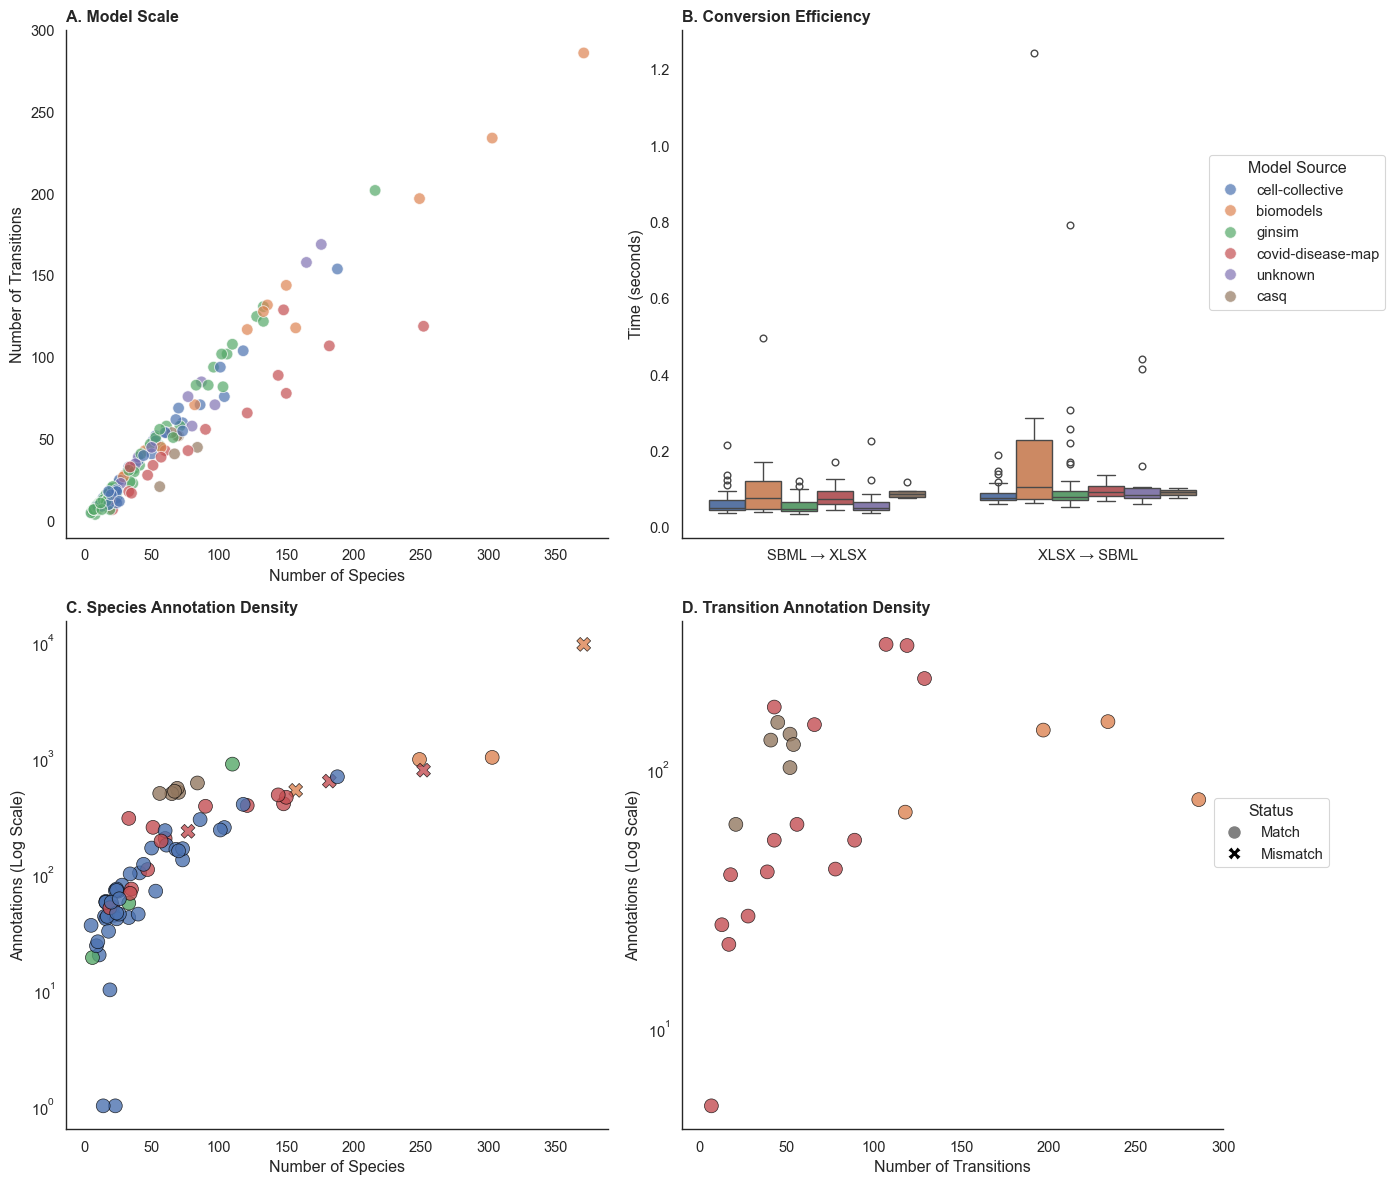

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for successful conversions
successful = results_df[
    results_df["sbml_to_xlsx_error"].isna() & 
    results_df["xlsx_to_sbml_error"].isna()
].copy()

# Create status columns for markers
successful['sp_status'] = successful['species_anno_match'].map({True: 'Match', False: 'Mismatch'})
successful['tr_status'] = successful['trans_anno_match'].map({True: 'Match', False: 'Mismatch'})

# Set Manuscript Style
sns.set_context("paper", font_scale=1.2)
sns.set_style("white")
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.25)

# --- A. TOP LEFT: Model Scale (Linear) ---
ax_scale = axes[0, 0]
sns.scatterplot(data=successful, x="original_sbml_species", y="original_sbml_transitions", 
                hue="source", s=70, alpha=0.7, ax=ax_scale, legend=True)
ax_scale.set_title("A. Model Scale", fontweight='bold', loc='left')
ax_scale.set_xlabel("Number of Species")
ax_scale.set_ylabel("Number of Transitions")

# --- B. TOP RIGHT: Conversion Time ---
ax_time = axes[0, 1]
# Comparing both directions of the conversion
time_df = successful.melt(id_vars=['source'], value_vars=['sbml_to_xlsx_time', 'xlsx_to_sbml_time'],
                          var_name='Direction', value_name='Seconds')
time_df['Direction'] = time_df['Direction'].replace({'sbml_to_xlsx_time': 'SBML → XLSX', 
                                                   'xlsx_to_sbml_time': 'XLSX → SBML'})
sns.boxplot(data=time_df, x='Direction', y='Seconds', hue='source', ax=ax_time)
ax_time.set_title("B. Conversion Efficiency", fontweight='bold', loc='left')
ax_time.set_xlabel("")
ax_time.set_ylabel("Time (seconds)")

# --- C. BOTTOM LEFT: Species Annotation Density (Log Scale) ---
ax_sp = axes[1, 0]
sns.scatterplot(data=successful, x="original_sbml_species", y="original_sbml_species_anno", 
                hue="source", style="sp_status", markers={'Match': 'o', 'Mismatch': 'X'},
                s=100, alpha=0.8, edgecolor='black', linewidth=0.5, ax=ax_sp, legend=False)
ax_sp.set_yscale('log')
ax_sp.set_title("C. Species Annotation Density", fontweight='bold', loc='left')
ax_sp.set_xlabel("Number of Species")
ax_sp.set_ylabel("Annotations (Log Scale)")

# --- D. BOTTOM RIGHT: Transition Annotation Density (Log Scale) ---
ax_tr = axes[1, 1]
sns.scatterplot(data=successful, x="original_sbml_transitions", y="original_sbml_trans_anno", 
                hue="source", style="tr_status", markers={'Match': 'o', 'Mismatch': 'X'},
                s=100, alpha=0.8, edgecolor='black', linewidth=0.5, ax=ax_tr, legend=False)
ax_tr.set_yscale('log')
ax_tr.set_title("D. Transition Annotation Density", fontweight='bold', loc='left')
ax_tr.set_xlabel("Number of Transitions")
ax_tr.set_ylabel("Annotations (Log Scale)")

# Unified Legend handling
for ax in axes.flat:
    ax.grid(False)
    sns.despine(ax=ax)
    if ax.get_legend():
        ax.get_legend().remove()

# Add one shared legend for Source and one for Match Status
handles, labels = ax_scale.get_legend_handles_labels()
status_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Match'),
                  plt.Line2D([0], [0], marker='X', color='w', markerfacecolor='black', markersize=10, label='Mismatch')]

fig.legend(handles, labels, title="Model Source", loc='center right', bbox_to_anchor=(1, 0.8))
fig.legend(handles=status_handles, title="Status", loc='center right', bbox_to_anchor=(0.96, 0.3))

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

# Tests

In [14]:
count_sbml_stats( "/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine_260125/043_BORDETELLA-BRONCHISEPTICA_source.sbml")

{'species_count': 33,
 'transitions_count': 33,
 'species_annotations': 42,
 'transition_annotations': 0,
 'error': None}

In [ ]:
sbml_path = Path( "/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine_260125/119_JNK-PATHWAY_source.sbml")
document = libsbml.readSBML(sbml_path)
model = document.getModel()
qual_plugin = model.getPlugin("qual")
species_count = qual_plugin.getNumQualitativeSpecies()
species_annotations = []
for i in range(species_count):
    qs = qual_plugin.getQualitativeSpecies(i)
    if qs.isSetAnnotation():
        anno_str = qs.getAnnotationString()
        # Return the entire annotation string after '<rdf:li[^>]*resource='
        matches = re.findall(r'<rdf:li[^>]*resource=[\'"]([^\'"]+)[\'"]', anno_str)
        species_annotations.append(matches)

sbml_2_path = Path( "/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioDivine_260125/converted_sbml/119_JNK-PATHWAY_source_converted.sbml")
document = libsbml.readSBML(sbml_2_path)
model = document.getModel()
qual_plugin = model.getPlugin("qual")
species_count2 = qual_plugin.getNumQualitativeSpecies()
species_annotations2 = []
for i in range(species_count):
    qs = qual_plugin.getQualitativeSpecies(i)
    if qs.isSetAnnotation():
        anno_str = qs.getAnnotationString()
        # Return the entire annotation string after '<rdf:li[^>]*resource='
        matches = re.findall(r'<rdf:li[^>]*resource=[\'"]([^\'"]+)[\'"]', anno_str)
        species_annotations2.append(matches)

# difference between transitions and transitions_2
for anno in species_annotations:
    if anno not in species_annotations2:
        print(anno)

['urn:miriam:ncbigene:6416', 'urn:miriam:ncbigene:6416', 'urn:casq:function:MEKK1/4_complex|SARS-CoV-1 proteins_complex', 'urn:casq:cdid:s5']
['urn:miriam:ncbigene:5609', 'urn:miriam:ncbigene:5609', 'urn:casq:function:MLK1/2/3_complex|SARS-CoV-1 proteins_complex', 'urn:casq:cdid:s6']
['urn:miriam:ncbigene:596', 'urn:miriam:ncbigene:596', 'urn:casq:function:JNK_complex_cell', 'urn:casq:cdid:s15']
['urn:miriam:obo.go:GO%3A0045087', 'urn:casq:function:AP-1_complex', 'urn:casq:cdid:s19']
['urn:miriam:obo.go:GO%3A0006915', 'urn:casq:function:!BCL2_phosphorylated', 'urn:casq:cdid:s20']
['urn:miriam:obo.go:GO%3A0006914', 'urn:casq:function:BCL2_phosphorylated', 'urn:casq:cdid:s21']
['urn:miriam:ncbigene:1386', 'urn:miriam:ncbigene:1386', 'urn:casq:function:JNK_complex_cell', 'urn:casq:cdid:s37']
['urn:miriam:ncbigene:7157', 'urn:miriam:ncbigene:7157', 'urn:casq:function:JNK_complex_cell', 'urn:casq:cdid:s38']
['urn:miriam:obo.go:GO%3A0072331', 'urn:casq:function:TP53_phosphorylated', 'urn:cas

In [35]:
species_annotations


[
    [
        'urn:casq:function:MAP2K4_phosphorylated|MAP2K7_phosphorylated|7a|3a&amp;JNK_complex_cell|JNK_complex_cell&amp;S',
        'urn:casq:cdid:s86'
    ],
    ['urn:casq:function:SARS-CoV-1 proteins_complex', 'urn:casq:cdid:s49'],
    ['urn:casq:function:JNK_complex_cell|3b', 'urn:casq:cdid:s87'],
    ['urn:casq:function:SARS-CoV-1 proteins_complex', 'urn:casq:cdid:s46'],
    ['urn:casq:function:SARS-CoV-1 proteins_complex', 'urn:casq:cdid:s94'],
    ['urn:casq:function:JNK_complex_cell', 'urn:casq:cdid:s107'],
    [
        'urn:miriam:ncbigene:6416',
        'urn:miriam:ncbigene:6416',
        'urn:casq:function:MEKK1/4_complex|SARS-CoV-1 proteins_complex',
        'urn:casq:cdid:s5'
    ],
    [
        'urn:miriam:ncbigene:5609',
        'urn:miriam:ncbigene:5609',
        'urn:casq:function:MLK1/2/3_complex|SARS-CoV-1 proteins_complex',
        'urn:casq:cdid:s6'
    ],
    [
        'urn:miriam:ncbigene:596',
        'urn:miriam:ncbigene:596',
        'urn:casq:functi

In [34]:
species_annotations2


[
    [
        'urn:casq:function:MAP2K4_phosphorylated|MAP2K7_phosphorylated|7a|3a&amp;JNK_complex_cell|JNK_complex_cell&amp;S',
        'urn:casq:cdid:s86'
    ],
    ['urn:casq:function:JNK_complex_cell', 'urn:casq:cdid:s107'],
    ['urn:casq:function:SARS-CoV-1 proteins_complex', 'urn:casq:cdid:s49'],
    ['urn:casq:function:SARS-CoV-1 proteins_complex', 'urn:casq:cdid:s94'],
    ['urn:casq:function:JNK_complex_cell|3b', 'urn:casq:cdid:s87'],
    ['urn:casq:function:SARS-CoV-1 proteins_complex', 'urn:casq:cdid:s46'],
    [
        'https://identifiers.org/ncbigene:596',
        'urn:casq:function:JNK_complex_cell',
        'urn:casq:cdid:s15'
    ],
    [
        'https://identifiers.org/obo.go:GO%3A0045087',
        'urn:casq:function:AP-1_complex',
        'urn:casq:cdid:s19'
    ],
    [
        'https://identifiers.org/obo.go:GO%3A0006915',
        'urn:casq:function:!BCL2_phosphorylated',
        'urn:casq:cdid:s20'
    ],
    [
        'https://identifiers.org/obo.go:GO%3A0

In [111]:
sbml_faure2006 = Path( "../examples/Faure2006/Faure2006_out.sbml")
doc = libsbml.readSBML(sbml_faure2006)
print(f"Number of errors: {doc.getNumErrors()}")
if doc.getNumErrors() > 0:
    print(f"Error message: {doc.getError(0).getMessage()}")

Number of errors: 0


In [ ]:
sbml_faure2006 = Path("examples/Faure2006/Faure2006_out.sbml")
results: pd.DataFrame = validate_sbml_annotations(sbml_faure2006)

In [ ]:
sbml_model = Path( "/Users/luna/Desktop/CRBM/Software/CaSQ/Small_Apoptosis.sbml")
results: pd.DataFrame = validate_sbml_annotations(sbml_model)